In [196]:
import torch
import numpy as np
from glob import glob
import os
import matplotlib
PATH = '/home/michael/Dropbox/Master thesis/results_graph_dc_new_lr_0_5/2_out/simple/frobenius/Feature_Analysis_single_runs/FeatureAnalysisGraph-DC_2_out_only_Frobenius_Diff_global_private_only_2_branches_NEW_sim_loss_lr_0_A0_F0_004_F0_004_H10/FedDomSep_GraphDC_gin_on_fs_contest_data_lr0_lstep1_/sub_exp_20230412155624/features'

train_test_val = 'train'

save_path = '/home/michael/Dropbox/Master thesis/results_graph_dc_new_lr_0_5/2_out/simple/CSV/frobenius/feature_analysis_single_runs/diff_0_004__0_004' +'/'+ train_test_val + '/'
if train_test_val == 'train':
    nun_samples = 11649
elif train_test_val == 'val':
    nun_samples = 3883
elif train_test_val == 'test':
    nun_samples = 3889

In [197]:
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [198]:
#interm_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
global_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
local_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
labels = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}


In [199]:
all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, '*.pt'))]
all_files.sort()

In [200]:
def get_files(path):
    for client in range(1, 13+1):
        client_path = f"{PATH}/client_{client}"
        all_files = [file
                 for path, subdir, files in os.walk(client_path)
                 for file in glob(os.path.join(path, '*.pt'))]
        all_files.sort()
        for file in all_files:
            file_name = os.path.basename(file)
            file_name_without_ending = file_name[:-3]
            if file_name_without_ending.startswith('global_' + train_test_val) and not file_name_without_ending.endswith('labels'):
                global_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith('local_' + train_test_val) and not\
                    file_name_without_ending.endswith('labels'):
                local_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith(train_test_val) and file_name_without_ending.endswith('labels'):
                labels[client].append(torch.load(file).cpu().detach().numpy())
        #interm_trains[client] = np.concatenate(interm_trains[client])
        global_trains[client] = np.concatenate(global_trains[client])
        local_trains[client] = np.concatenate(local_trains[client])
        labels[client] = np.concatenate(labels[client])


In [201]:
PATH

'/home/michael/Dropbox/Master thesis/results_graph_dc_new_lr_0_5/2_out/simple/frobenius/Feature_Analysis_single_runs/FeatureAnalysisGraph-DC_2_out_only_Frobenius_Diff_global_private_only_2_branches_NEW_sim_loss_lr_0_A0_F0_004_F0_004_H10/FedDomSep_GraphDC_gin_on_fs_contest_data_lr0_lstep1_/sub_exp_20230412155624/features'

In [202]:
get_files(PATH)

In [203]:
import numpy as np
#concat_X=global_train
data_out_local_global = {}
data_out_local = {}
data_out_global = {}

for key in local_trains.keys():
    data_out_local_global[key] = global_trains[key] + local_trains[key]
    data_out_local[key] = local_trains[key]
    data_out_global[key] = global_trains[key]

X_concat_local_global = []
X_concat_local = []
X_concat_global = []
labels_concat = []

for key in local_trains.keys():
    X_concat_local_global.append(data_out_local_global[key])
    X_concat_local.append(data_out_local[key])
    X_concat_global.append(data_out_global[key])
    labels_concat.append(labels[key])

X_concat_local_global = np.concatenate(X_concat_local_global)
X_concat_local = np.concatenate(X_concat_local)
X_concat_global = np.concatenate(X_concat_global)

labels_concat = np.concatenate(labels_concat)

In [204]:
from sklearn.manifold import TSNE

In [205]:
labels_global = labels.copy()


In [206]:
X_concat = np.concatenate([X_concat_local_global, X_concat_local, X_concat_global])
labels_double_concat = np.concatenate([labels_concat, labels_concat, labels_concat])

In [207]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat, labels_double_concat)

In [208]:
X_embedded.shape[0]//2

17473

In [209]:
# Feature Analysis for client 9:
global_trains[9]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16749448, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00784533, 0.        ,
        0.        ]], dtype=float32)

In [210]:
local_trains[9]

array([[0.        , 0.28160155, 0.19630903, ..., 0.        , 0.36623436,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45529205, 0.        , 0.        , ..., 0.        , 0.        ,
        0.9671665 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11320169, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2216879 , 0.        , 0.        , ..., 0.        , 0.24620545,
        0.62435496]], dtype=float32)

In [211]:
cos_sim = torch.nn.CosineSimilarity()

In [212]:
isExist = os.path.exists(save_path)
if not isExist:
    os.makedirs(save_path)

In [213]:
import pandas as pd

df = pd.DataFrame()

In [214]:
num_total_features = []
num_local_features_not_0 = []
avg_local_features_not_0 = []
num_global_features_not_0 = []
num_features_global_local = []
avg_global_features_not_0 = []
num_local_global_features_not_0 = []
avg_local_global_features_not_0 = []
cos_sim_local_global = []
cos_sim_local_local_global = []
cos_sim_global_local_global = []

In [215]:
for client in range(1, 13+1):


    local_train_curr = local_trains[client]
    global_train_curr = global_trains[client]

    num_total_features.append(local_train_curr.shape[0] * local_train_curr.shape[1])
    num_total_features_curr = local_train_curr.shape[0] * local_train_curr.shape[1]

    local_global = local_train_curr + global_train_curr

    mult_local_global = global_train_curr*local_train_curr

    num_local_features_not_0.append(np.sum(local_train_curr != 0) / num_total_features_curr)
    avg_local_features_not_0.append(local_train_curr.sum() / np.sum(local_train_curr != 0))
    num_global_features_not_0.append(np.sum(global_train_curr != 0) / num_total_features_curr)
    avg_global_features_not_0.append(global_train_curr.sum() / np.sum(global_train_curr != 0))
    num_local_global_features_not_0.append(np.sum(local_global != 0) / num_total_features_curr)
    avg_local_global_features_not_0.append(local_global.sum() / np.sum(local_global != 0))

    num_features_global_local.append(np.sum(mult_local_global != 0) / num_total_features_curr)

    cos_sim_local_global.append(cos_sim(torch.Tensor(global_train_curr), torch.Tensor(local_train_curr)).mean().item())
    cos_sim_local_local_global.append(cos_sim(torch.Tensor(local_train_curr), torch.Tensor(local_global)).mean().item())
    cos_sim_global_local_global.append(cos_sim(torch.Tensor(global_train_curr), torch.Tensor(local_global)).mean().item())
    """
    print(f"############ Client {client} ##############")
    print(f"total features: {round(num_total_features,2)}")
    print(f"num_local_features_not_0:\n{round(num_local_features_not_0,2)}")
    print(f"avg_local_features_not_0:\n{round(avg_local_features_not_0,2)}")

    print(f"num_global_features_not_0:\n{round(num_global_features_not_0,2)}")
    print(f"num_features_global_local:\n{round(num_features_global_local,2)}")
    print(f"avg_global_features_not_0:\n{round(avg_global_features_not_0,2)}")

    print(f"num_local_global_features_not_0:\n{round(num_local_global_features_not_0,2)}")
    print(f"avg_local_global_features_not_0:\n{round(avg_local_global_features_not_0,2)}")

    print(f"cos_sim_global_local:\n{round(cos_sim_local_global,2)}")
    print(f"cos_sim_local_local_global:\n{round(cos_sim_local_local_global,2)}")
    print(f"cos_sim_global_local_global:\n{round(cos_sim_global_local_global,2)}")

    """

In [216]:
data_map = {
    ('total','# Features'): num_total_features,
    ('local', '# features != 0'): num_local_features_not_0,
    ('local', 'avg features != 0'): avg_local_features_not_0,
    ('global', '# features != 0'): num_global_features_not_0,
    ('global', '# Features != 0 in both local and global'): num_features_global_local,
    ('global', 'avg features != 0'): avg_global_features_not_0,
    ('local-global', '# features != 0'): num_local_global_features_not_0,
    ('local-global', 'avg features != 0'): avg_local_global_features_not_0,
    ('cos_sim', 'local_global',): cos_sim_local_global,
    ('cos_sim', 'local__local-global',): cos_sim_local_local_global,
    ('cos_sim', 'global__local-global',): cos_sim_global_local_global,
}
df = pd.DataFrame(data=data_map)
df.to_csv(save_path + 'statistics.csv')

In [217]:
X_embedded_local_global = X_embedded[:nun_samples,:]
X_embedded_local = X_embedded[nun_samples:nun_samples+nun_samples,:]
X_embedded_global = X_embedded[nun_samples+nun_samples:,:]


In [218]:
X_embedded.shape[0]/3

11649.0

In [219]:
#X_embedded_global = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat_global, labels_concat)
#X_embedded_local = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat_interm, labels_concat)
#X_embedded_interm = X_embedded_local

In [220]:
#X_embedded_interm = X_embedded_local

In [221]:
X_embedded_global_clients = {}
X_embedded_local_clients = {}
X_embedded_local_global_clients = {}
labels_clients = {}
total_size = 0

for client in range(1, 13+1):
    print(f"size client {client}: {local_trains[client].shape[0]}")
    size = local_trains[client].shape[0]
    size_old = total_size
    total_size += size
    X_embedded_global_clients[client] = X_embedded_global[size_old:total_size,:]
    X_embedded_local_clients[client] = X_embedded_local[size_old:total_size,:]
    X_embedded_local_global_clients[client] = X_embedded_local_global[size_old:total_size,:]
    labels_clients[client] = labels_concat[size_old:total_size]

size client 1: 112
size client 2: 243
size client 3: 280
size client 4: 453
size client 5: 206
size client 6: 1200
size client 7: 2466
size client 8: 2602
size client 9: 2476
size client 10: 201
size client 11: 210
size client 12: 600
size client 13: 600


In [222]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 18))
plt.rcParams["figure.figsize"] = (30,18)
plt.rc('xtick', labelsize=32)    # fontsize of the tick labels
plt.rc('ytick', labelsize=32)    # fontsize of the tick labels
plt.rc('legend', fontsize=32)
plt.rc('font', size=32)

<Figure size 3000x1800 with 0 Axes>

In [223]:
"""yellow: label=1"""

'yellow: label=1'

In [224]:
client_num = 13

In [225]:
save_path

'/home/michael/Dropbox/Master thesis/results_graph_dc_new_lr_0_5/2_out/simple/CSV/frobenius/feature_analysis_single_runs/diff_0_004__0_004/train/'

In [226]:
colors=['red', 'blue']
for client in range(1, client_num+1):
    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_global_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60, )
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_global')
    plt.clf()

    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_local_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60, )
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_local')
    plt.clf()

    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_local_global_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_local_global')
    plt.clf()




<Figure size 3000x1800 with 0 Axes>

(-120.0, 120.0)

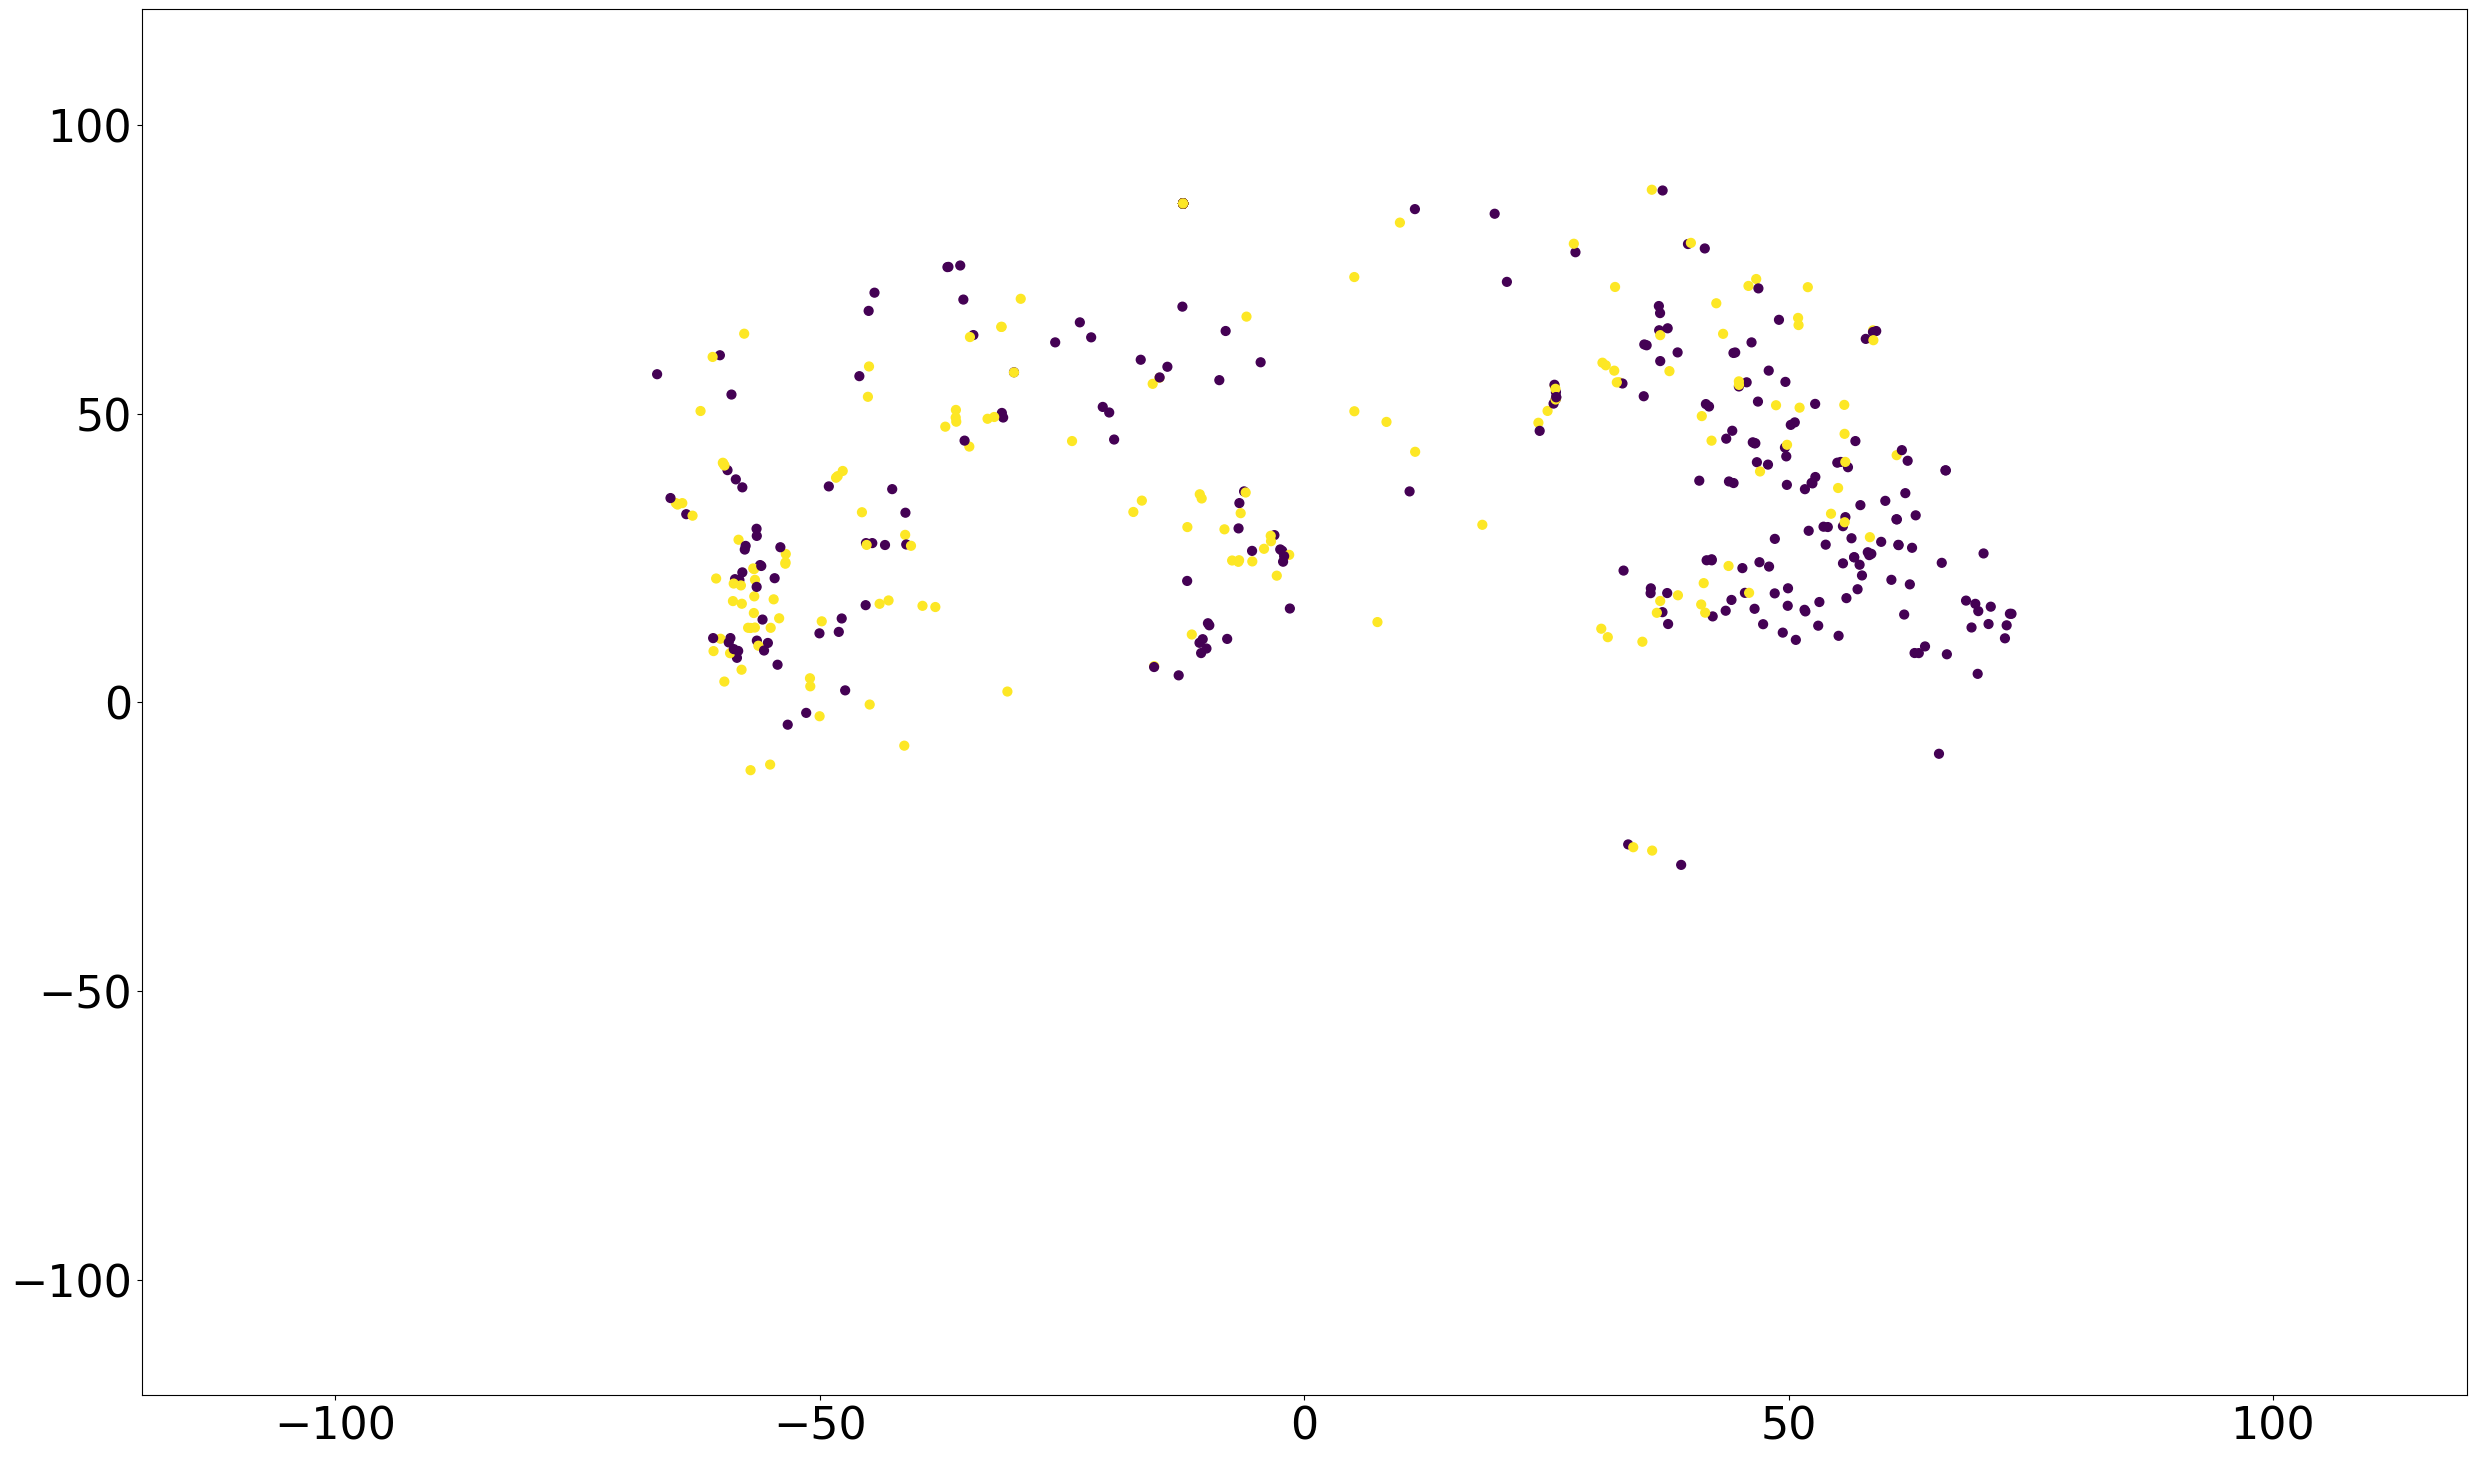

In [227]:
plt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], s=40 )
plt.xlim(-120, 120)
plt.ylim(-120, 120)

In [228]:
"""
plt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [229]:
"""
plt.scatter(X_embedded_local_clients[client_num][:, 0], X_embedded_local_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_local_clients[client_num][:, 0], X_embedded_local_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [230]:
"""
plt.scatter(X_embedded_local_global_clients[client_num][:, 0], X_embedded_local_global_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_local_global_clients[client_num][:, 0], X_embedded_local_global_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [231]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(30, 18))
#plt.rcParams["figure.figsize"] = (30,18)

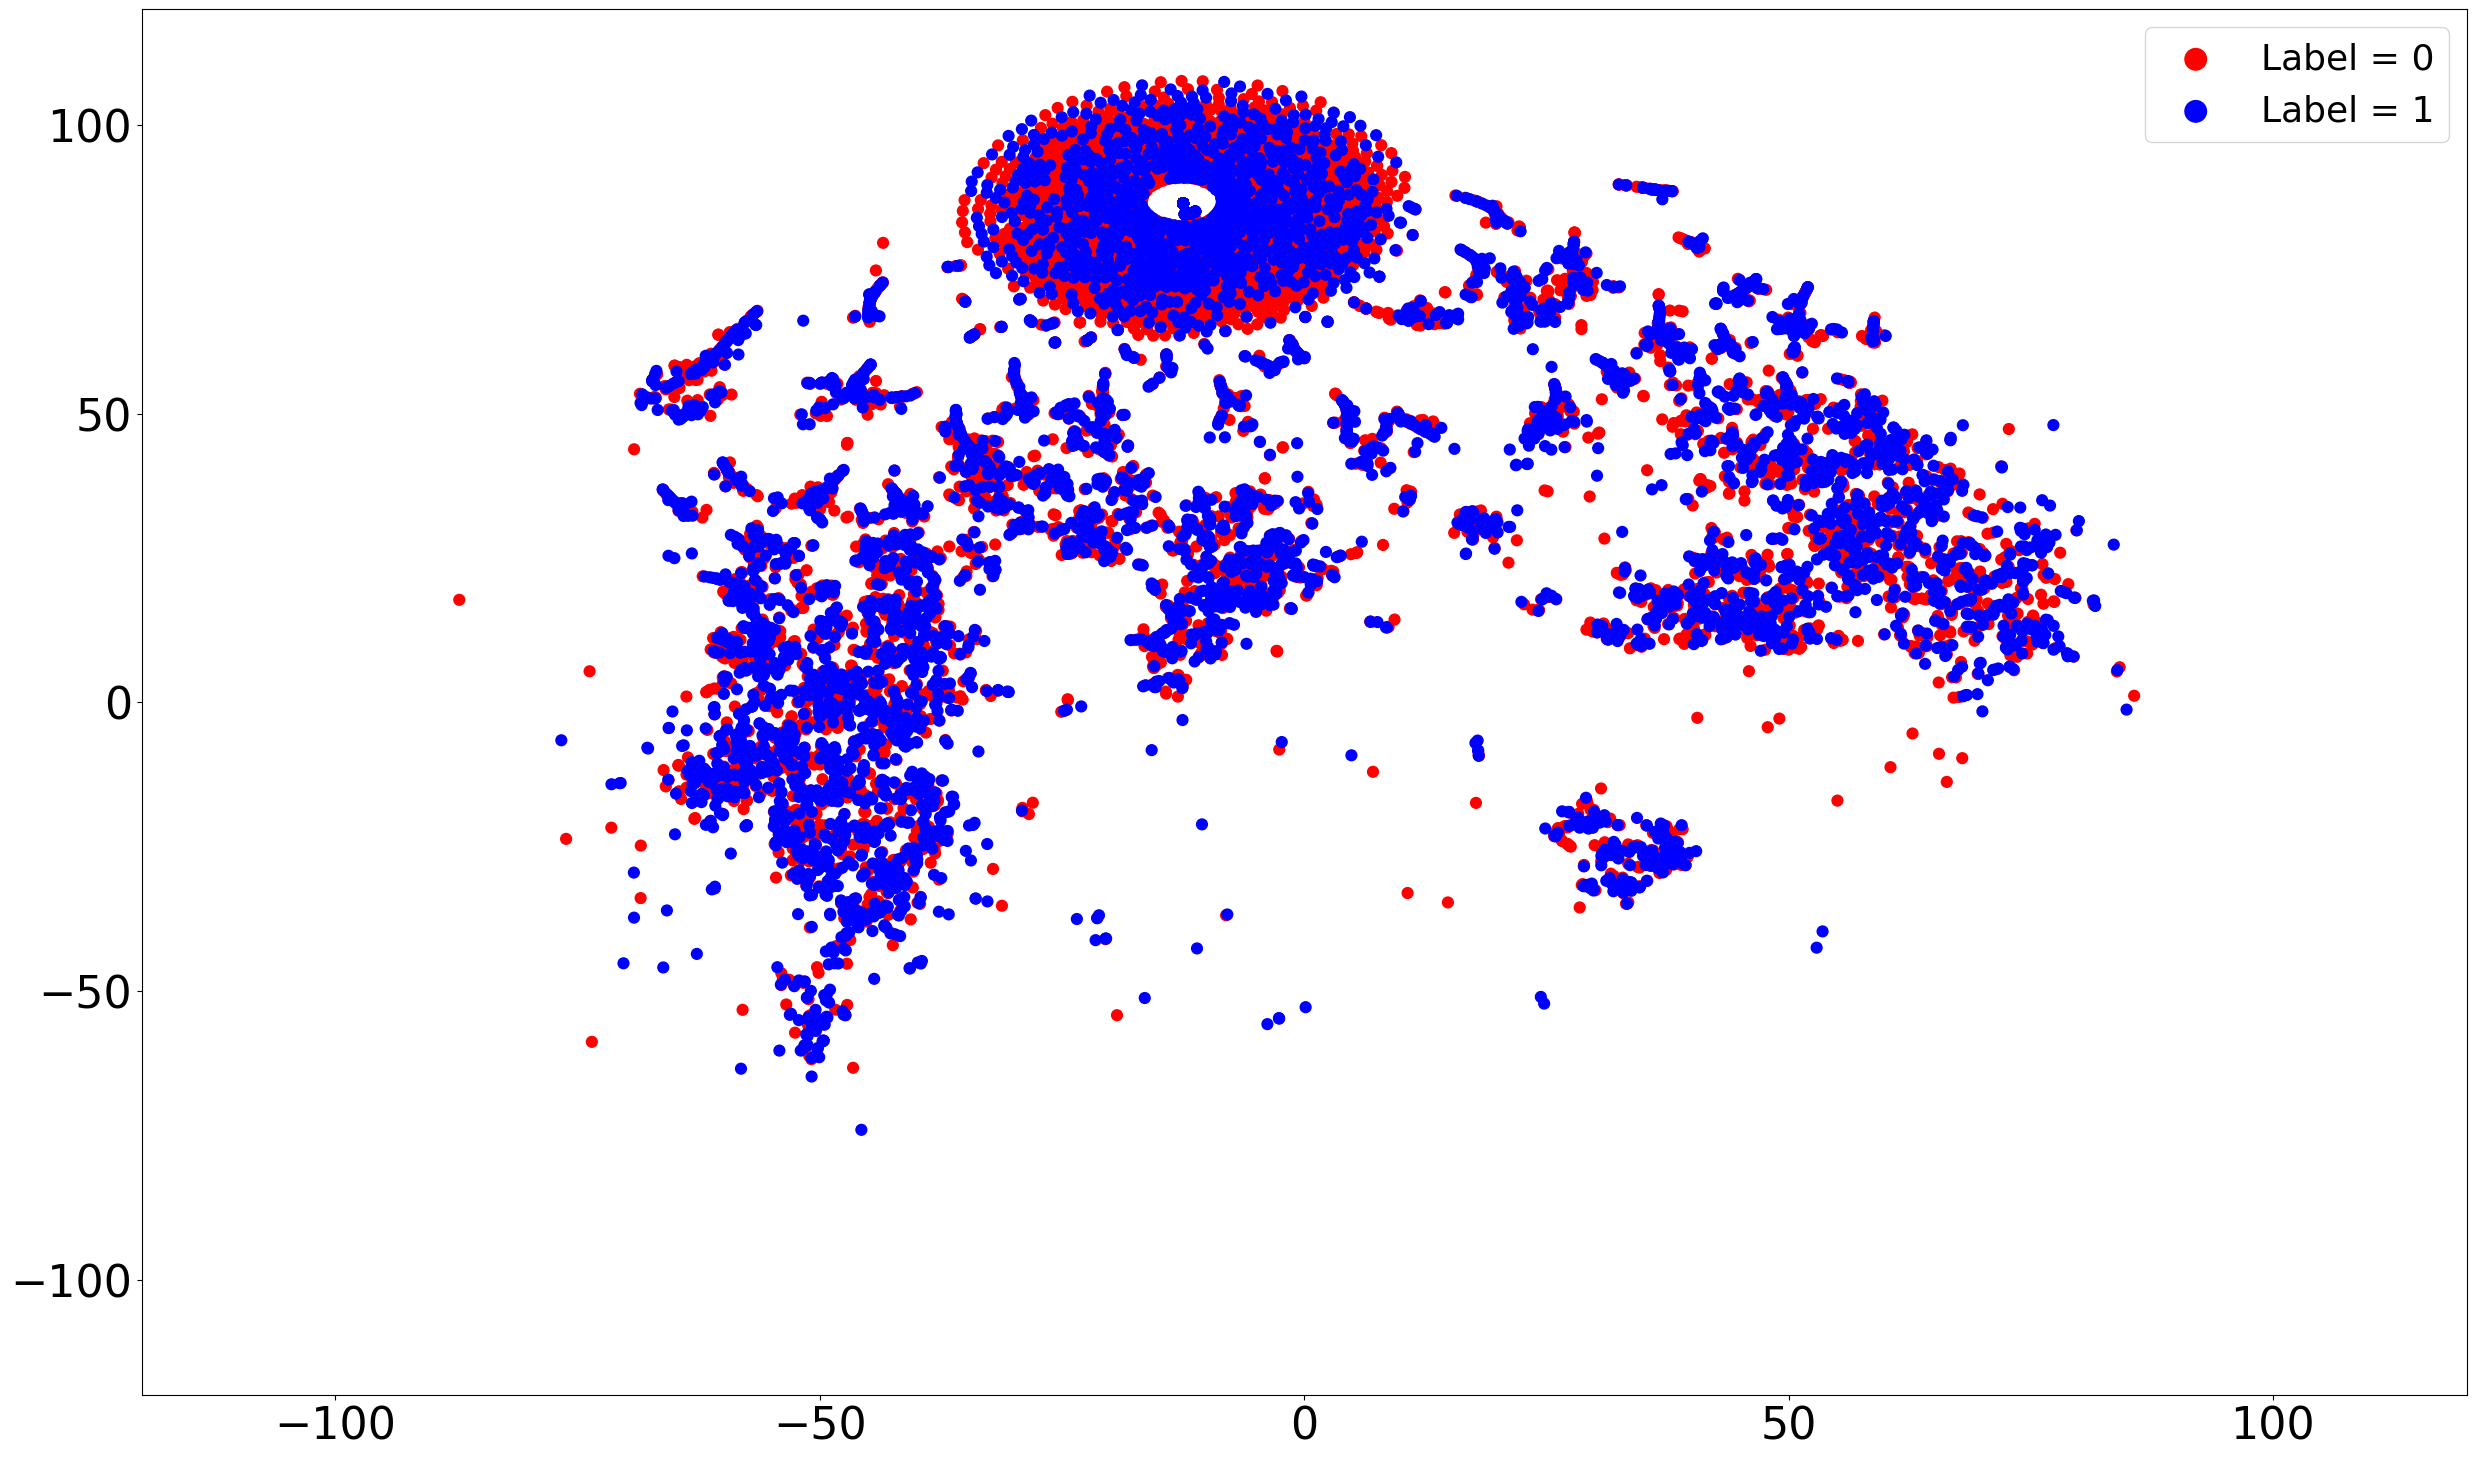

<Figure size 3000x1800 with 0 Axes>

In [232]:
colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_global[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_global')
plt.show()
plt.clf()

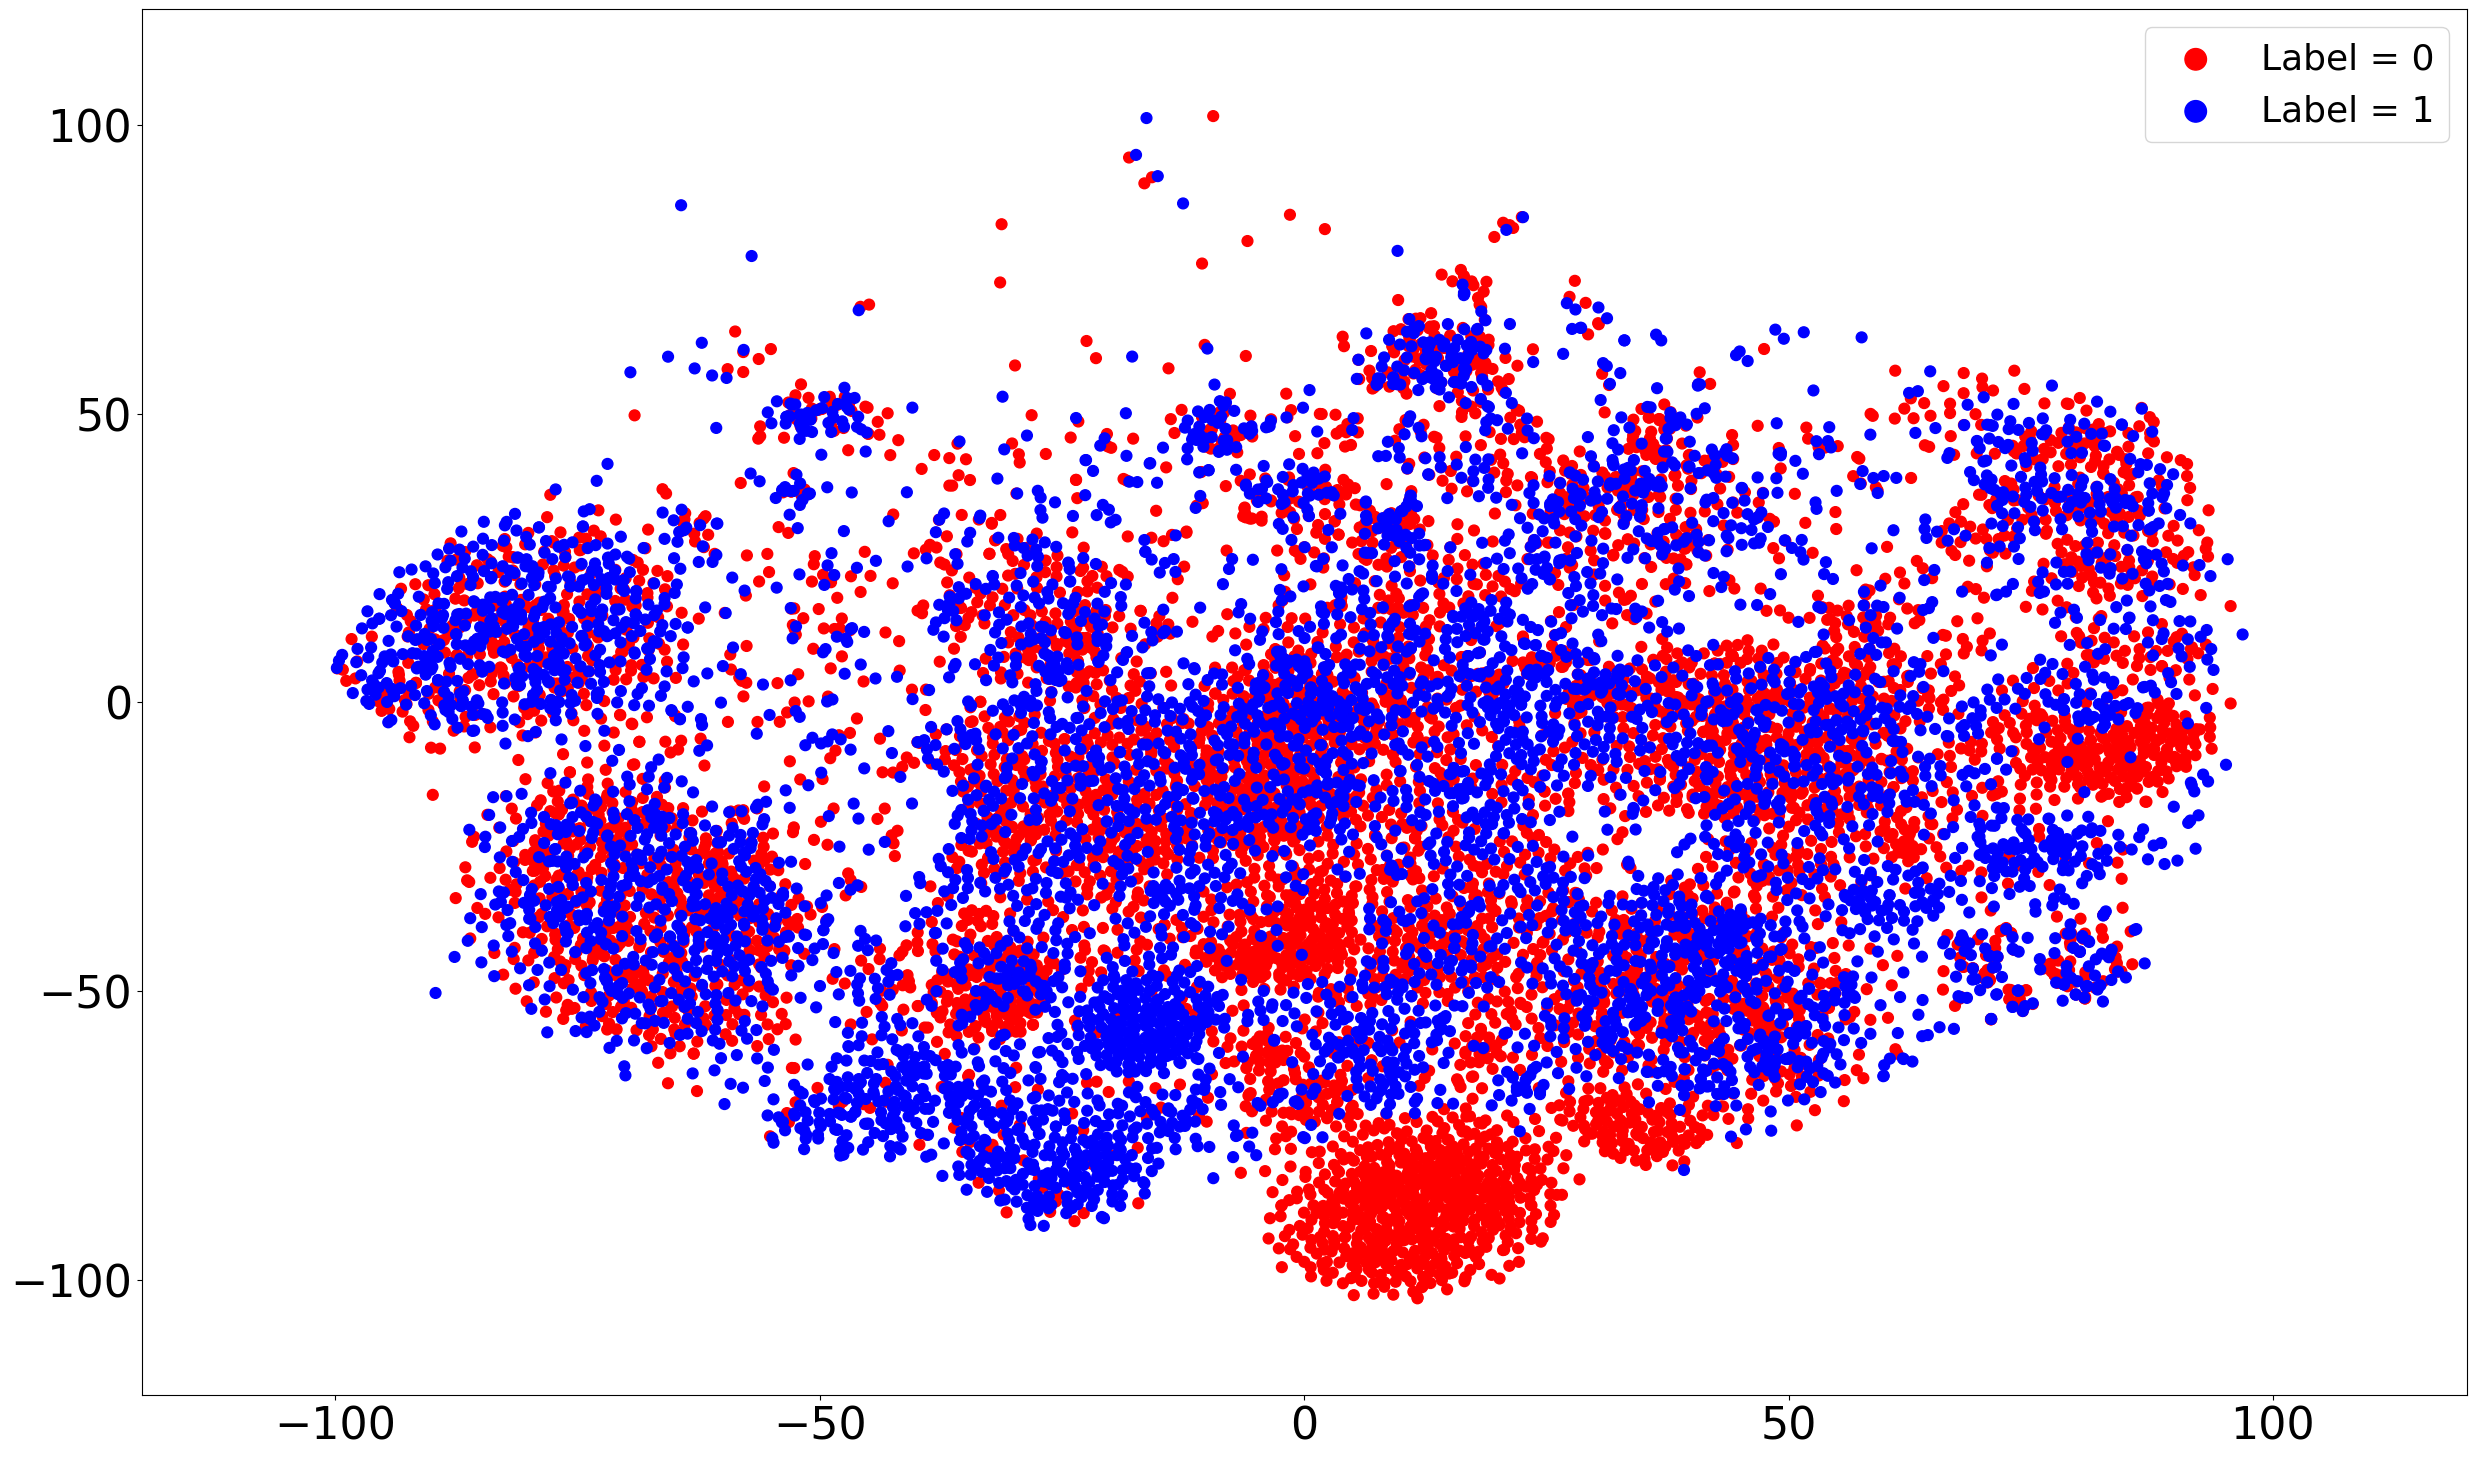

<Figure size 3000x1800 with 0 Axes>

In [233]:

colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_local[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_local')
plt.show()
plt.clf()

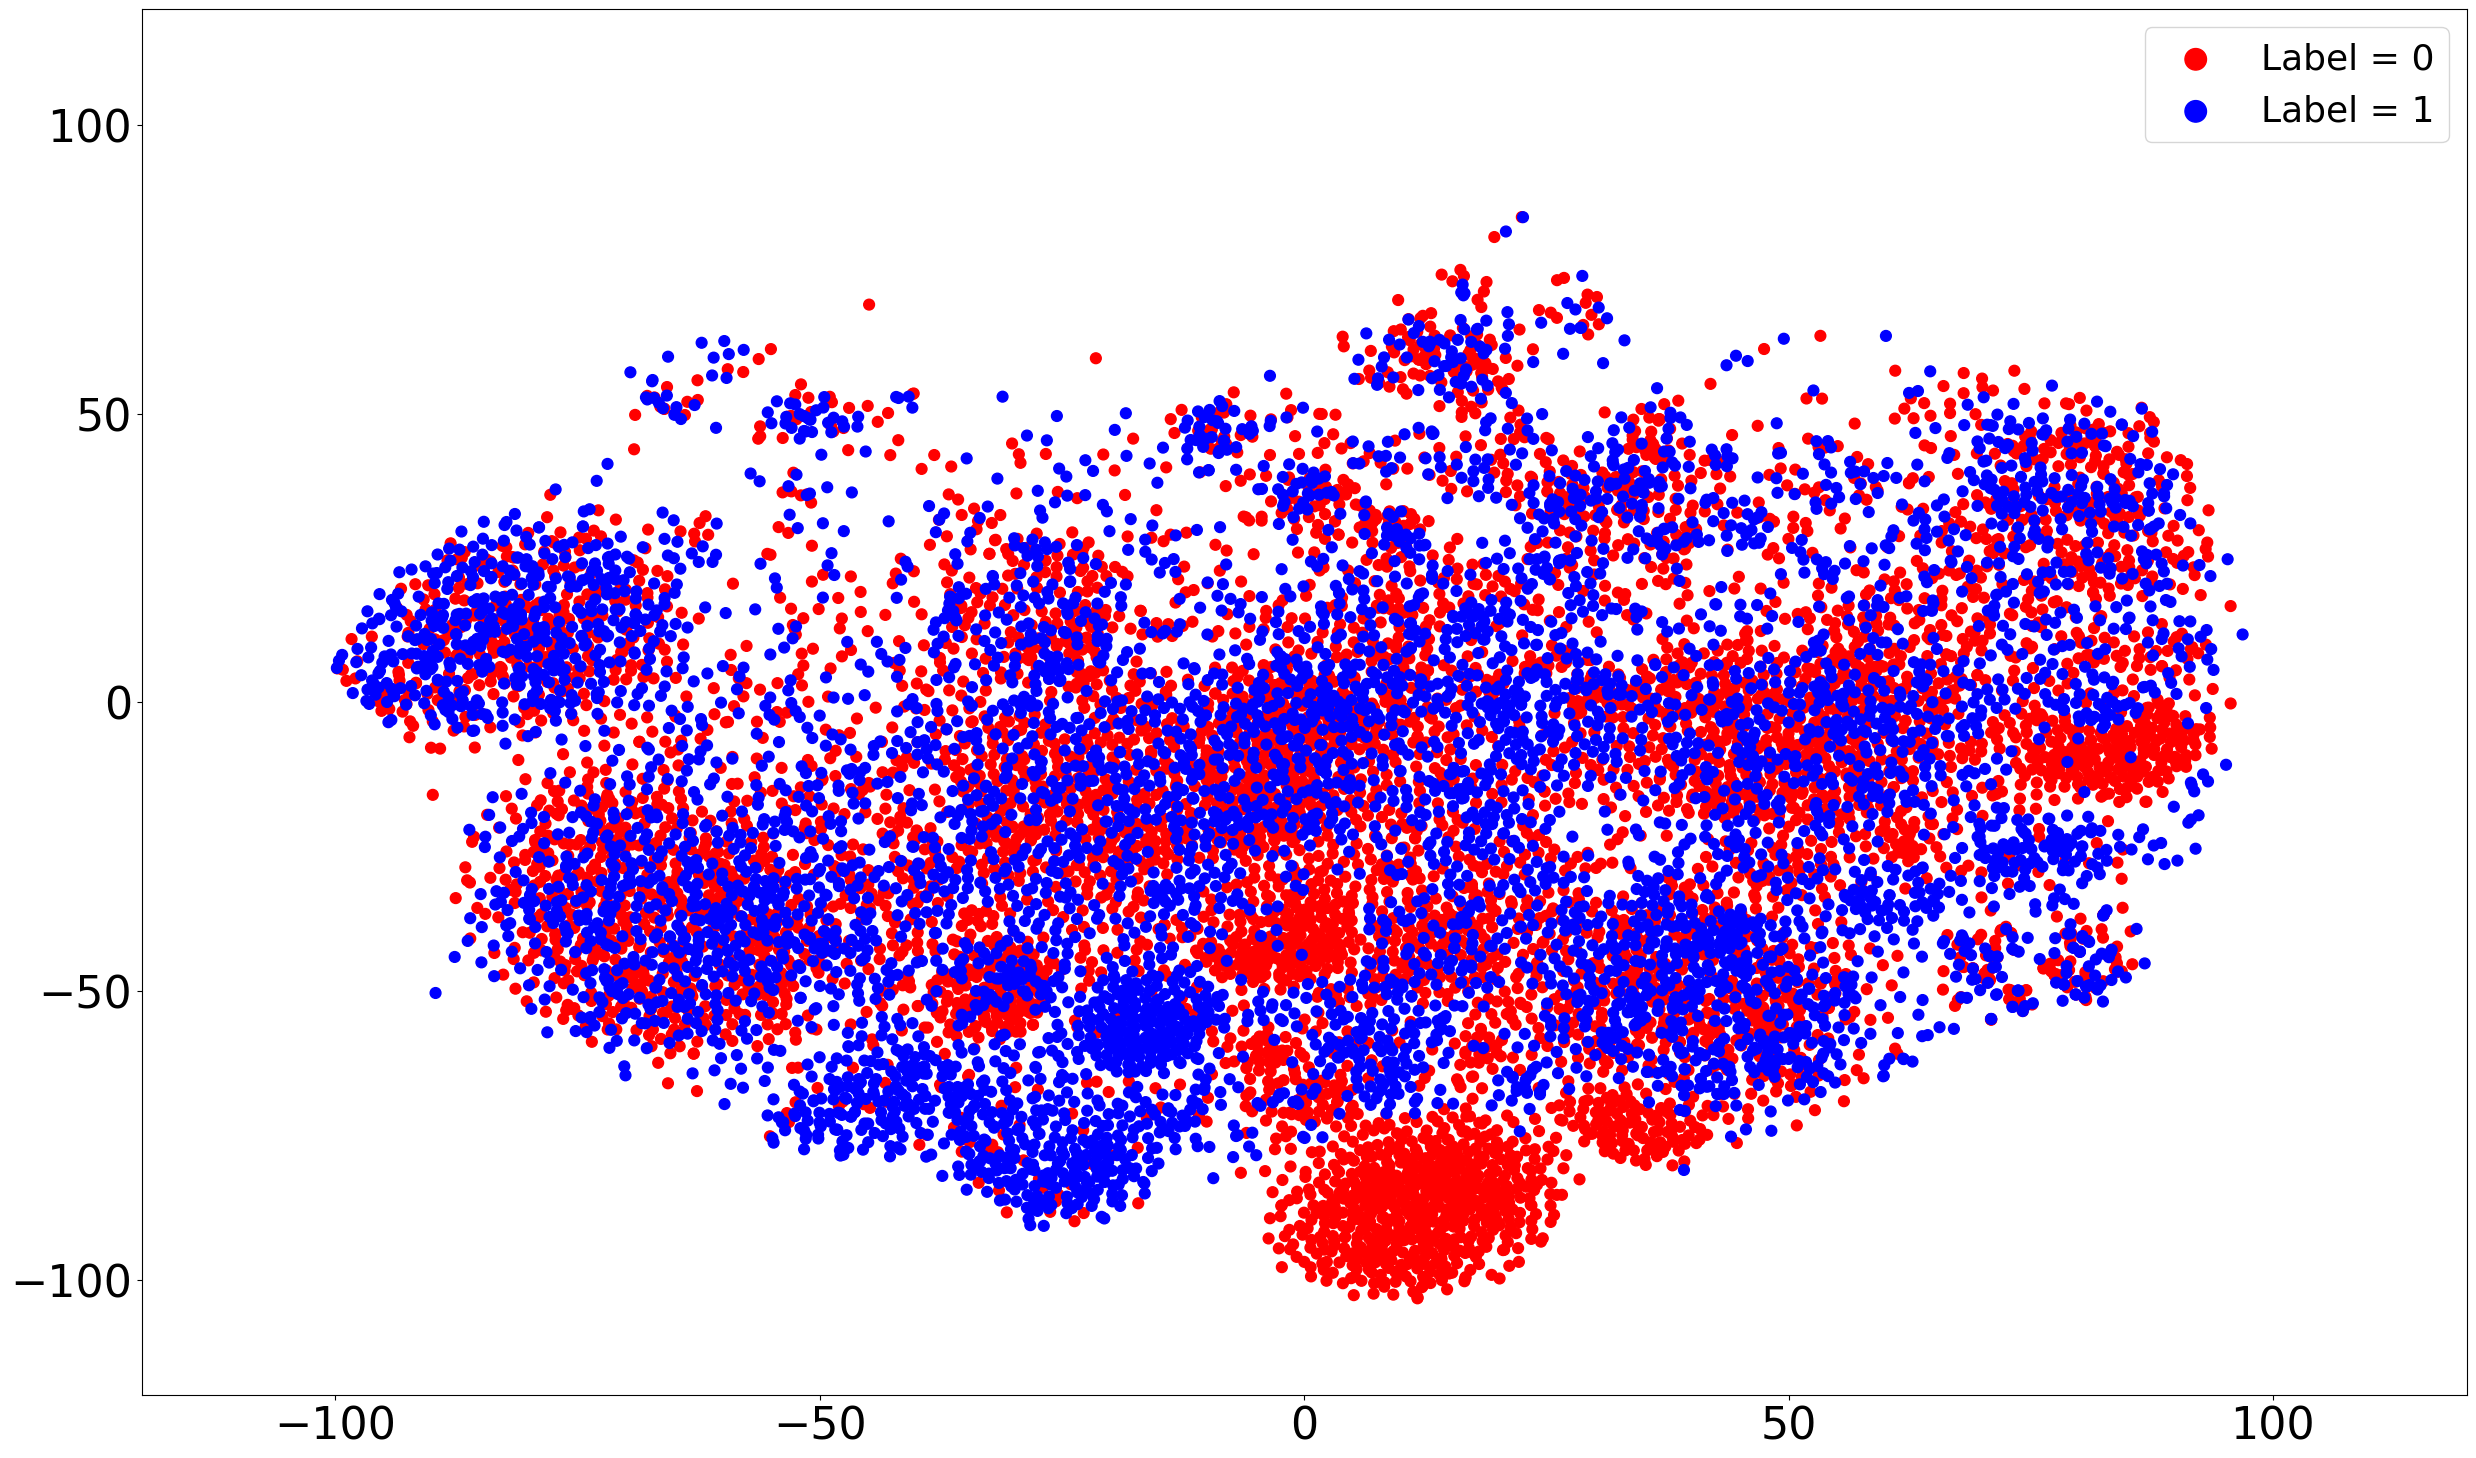

<Figure size 3000x1800 with 0 Axes>

In [234]:
colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_local_global[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_local_global')
plt.show()
plt.clf()

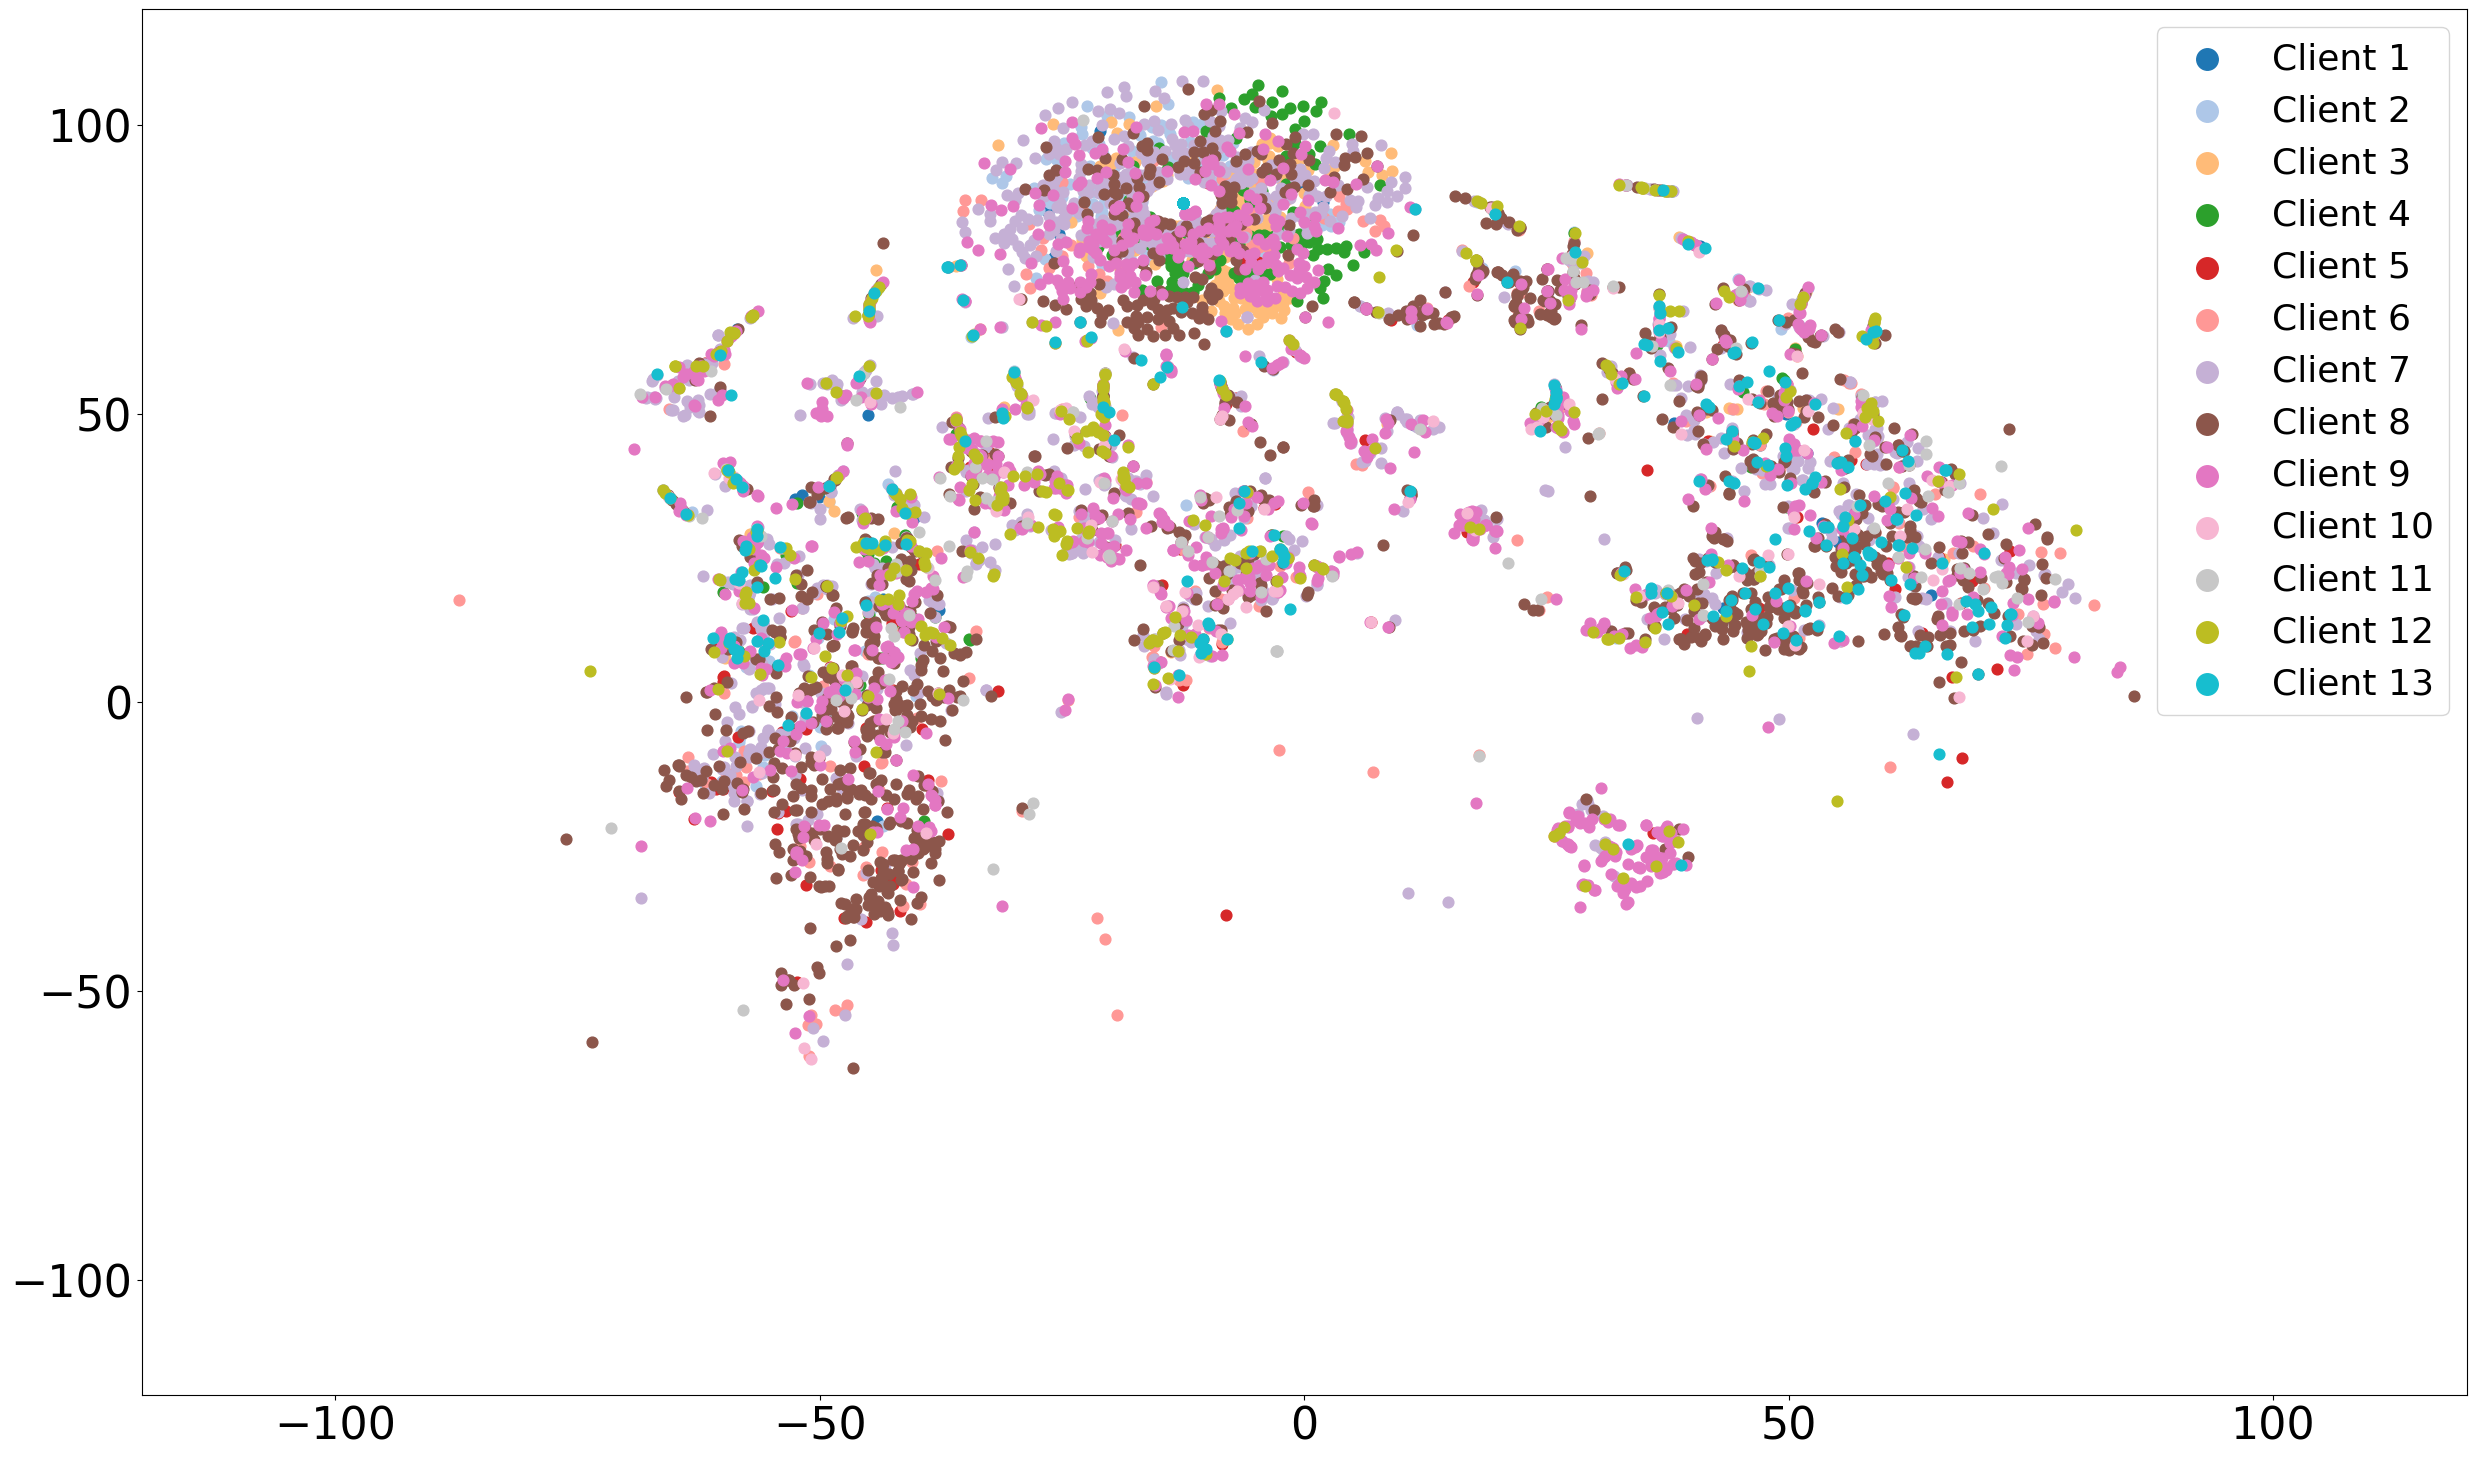

In [235]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_global_clients_only_label_0 = X_embedded_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_global_clients_only_label_0[:,0], X_embedded_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'global_comparison_label_0')

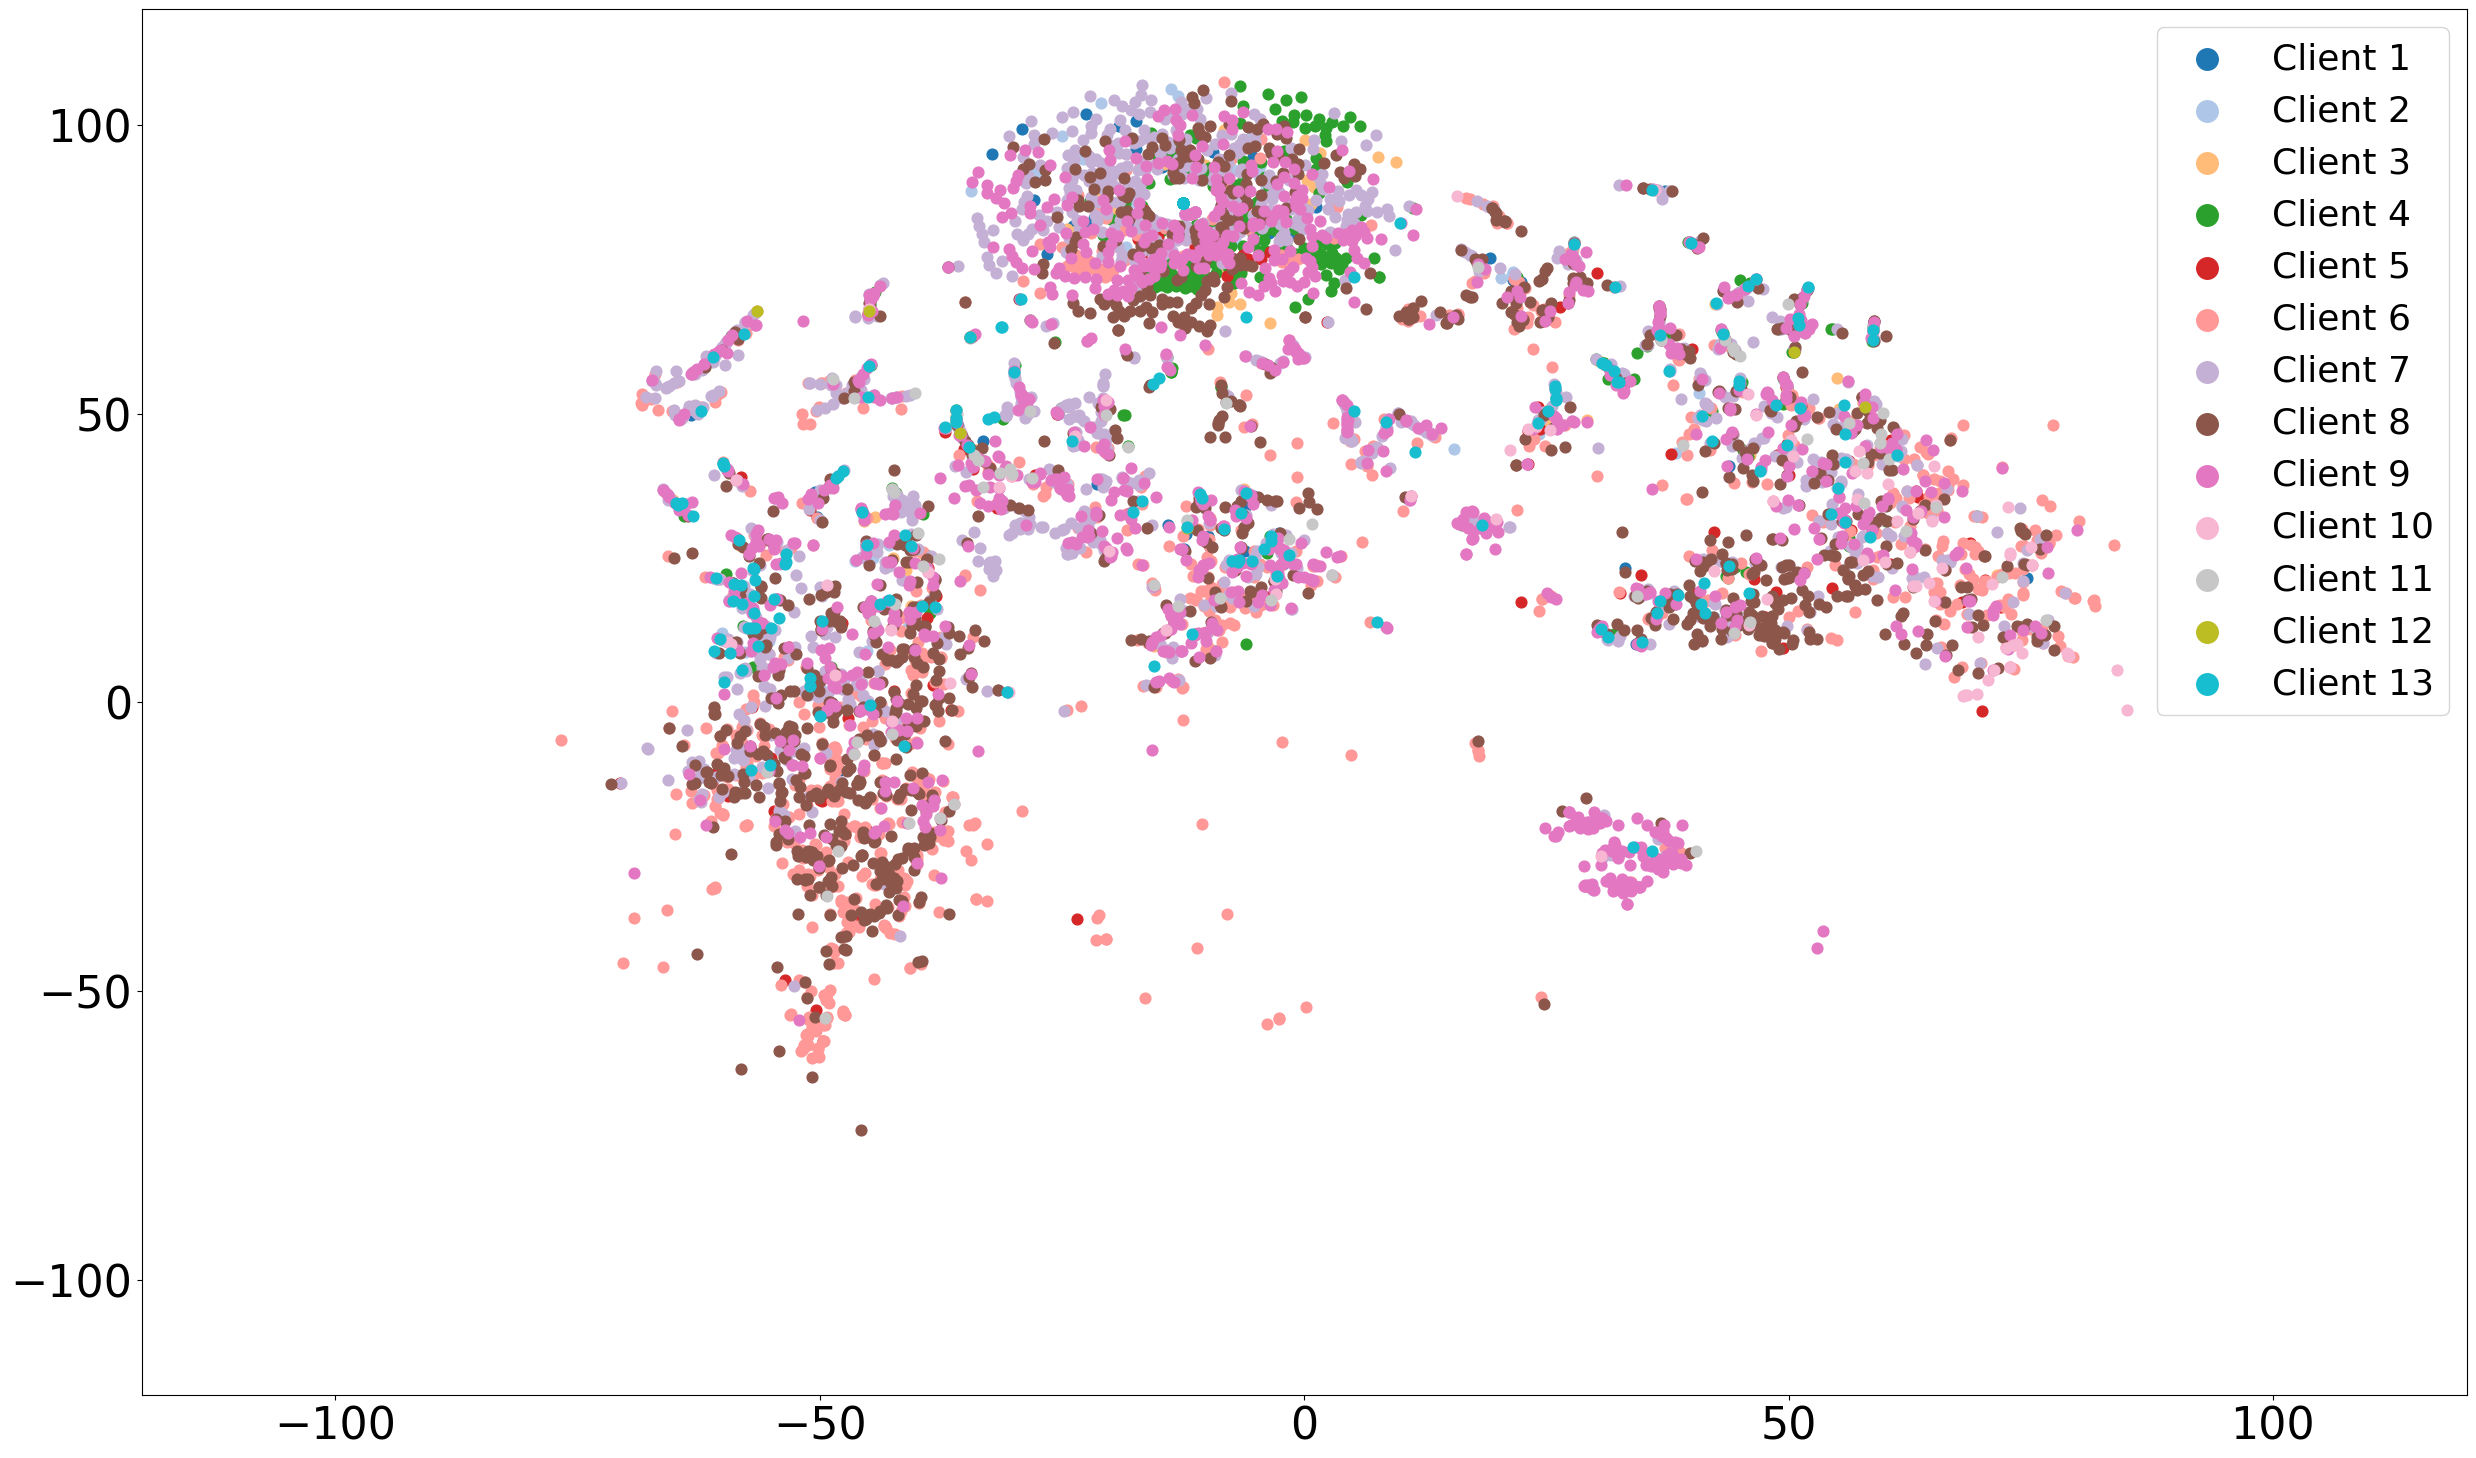

In [236]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_1 = labels_clients[client] == 1
    X_embedded_global_clients_only_label_1 = X_embedded_global_clients[client][labels_1, :]
    ax.scatter(X_embedded_global_clients_only_label_1[:,0], X_embedded_global_clients_only_label_1[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'global_comparison_label_1')

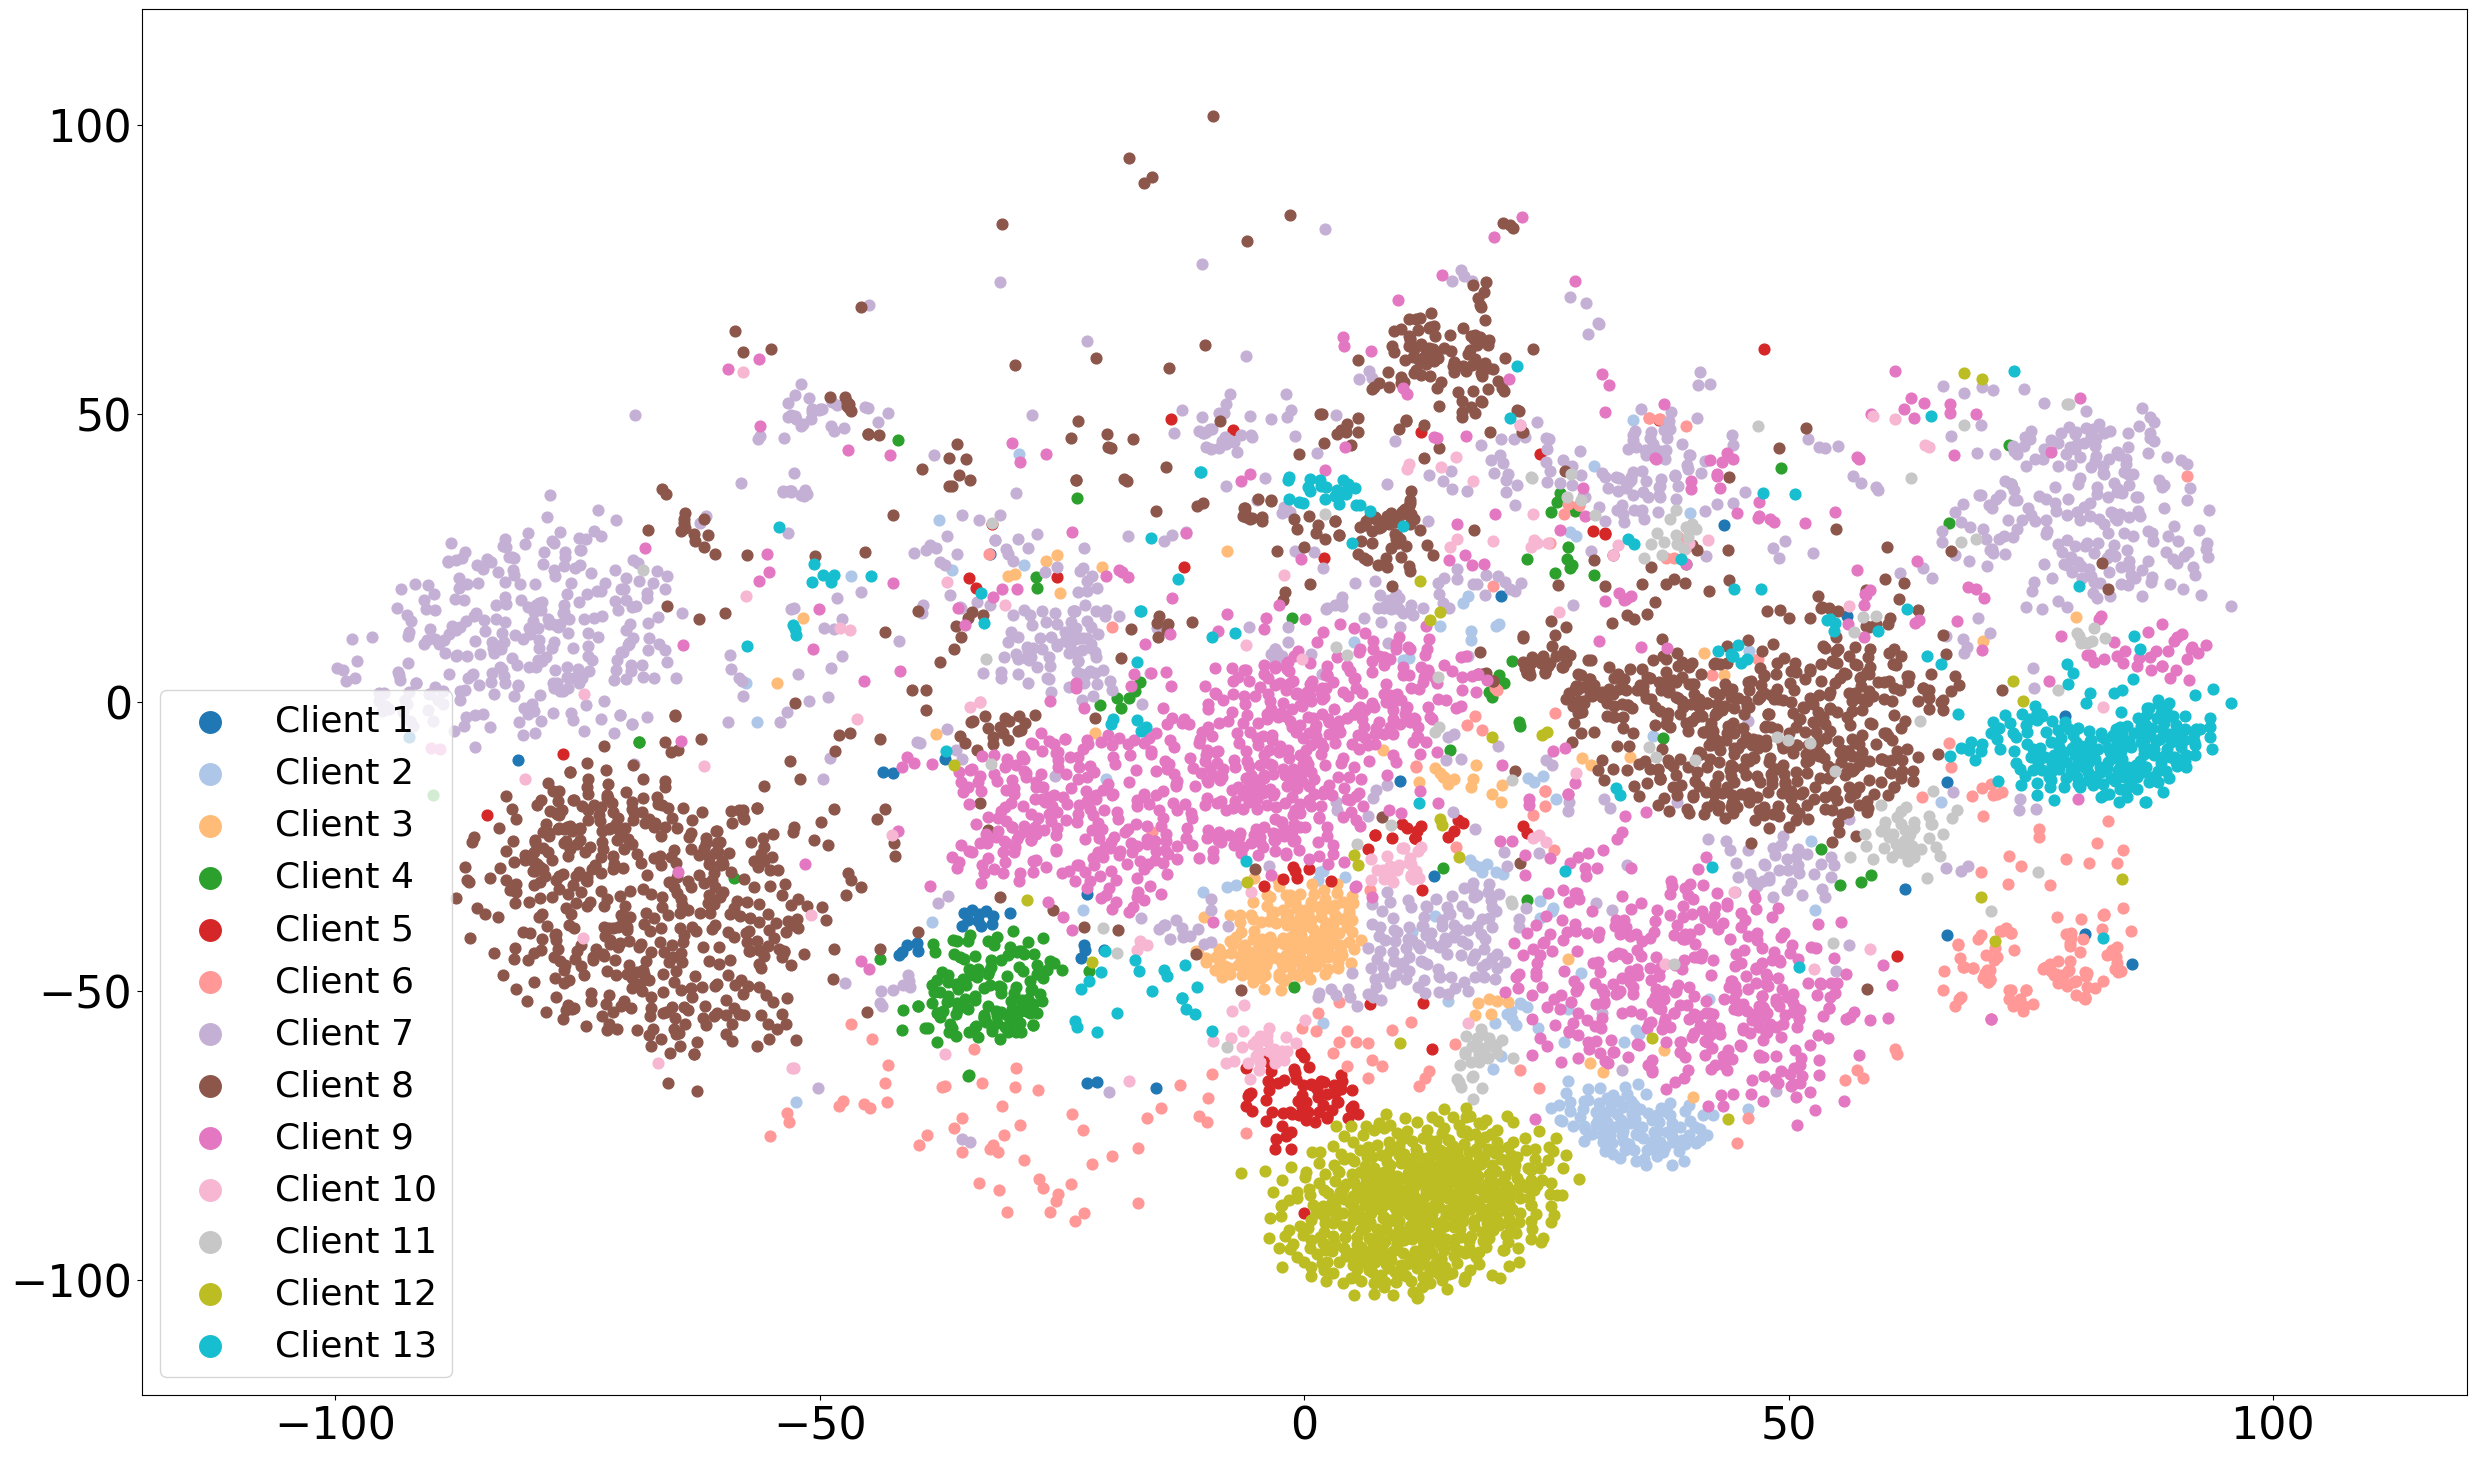

In [237]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_local_clients_only_label_0 = X_embedded_local_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_clients_only_label_0[:,0], X_embedded_local_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_comparison_label_0')

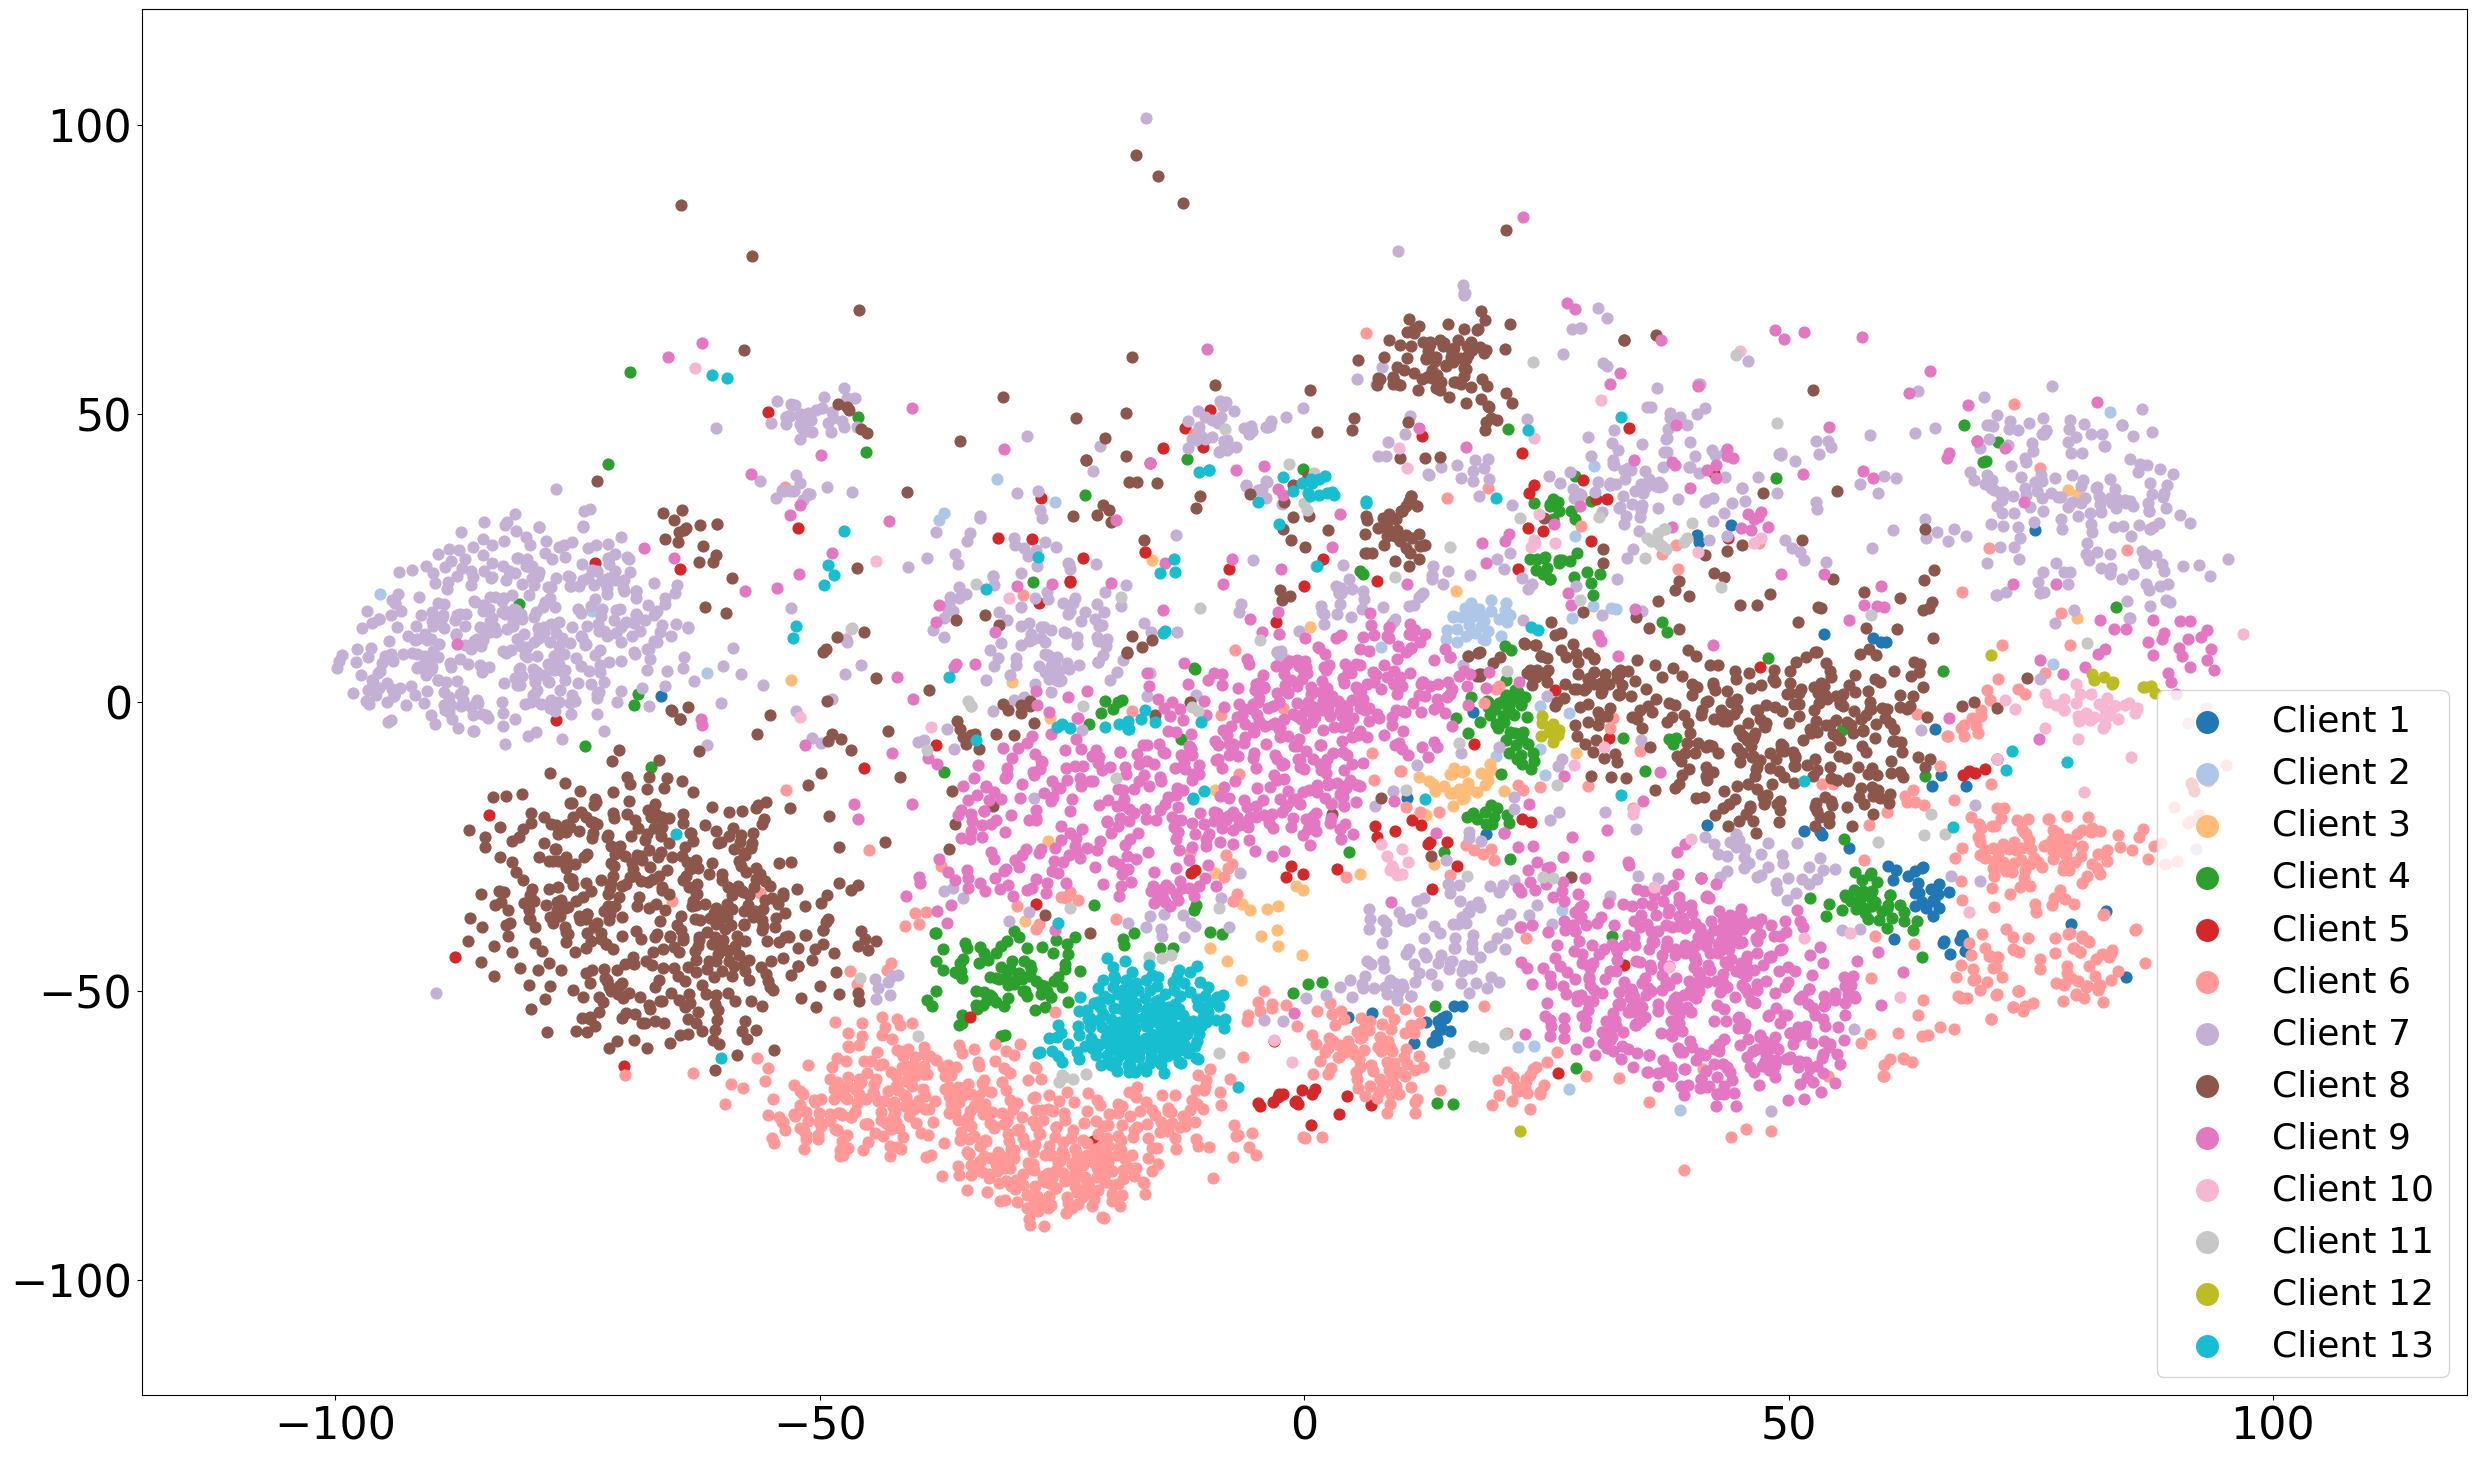

In [238]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 1
    X_embedded_local_clients_only_label_0 = X_embedded_local_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_clients_only_label_0[:,0], X_embedded_local_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_comparison_label_1')

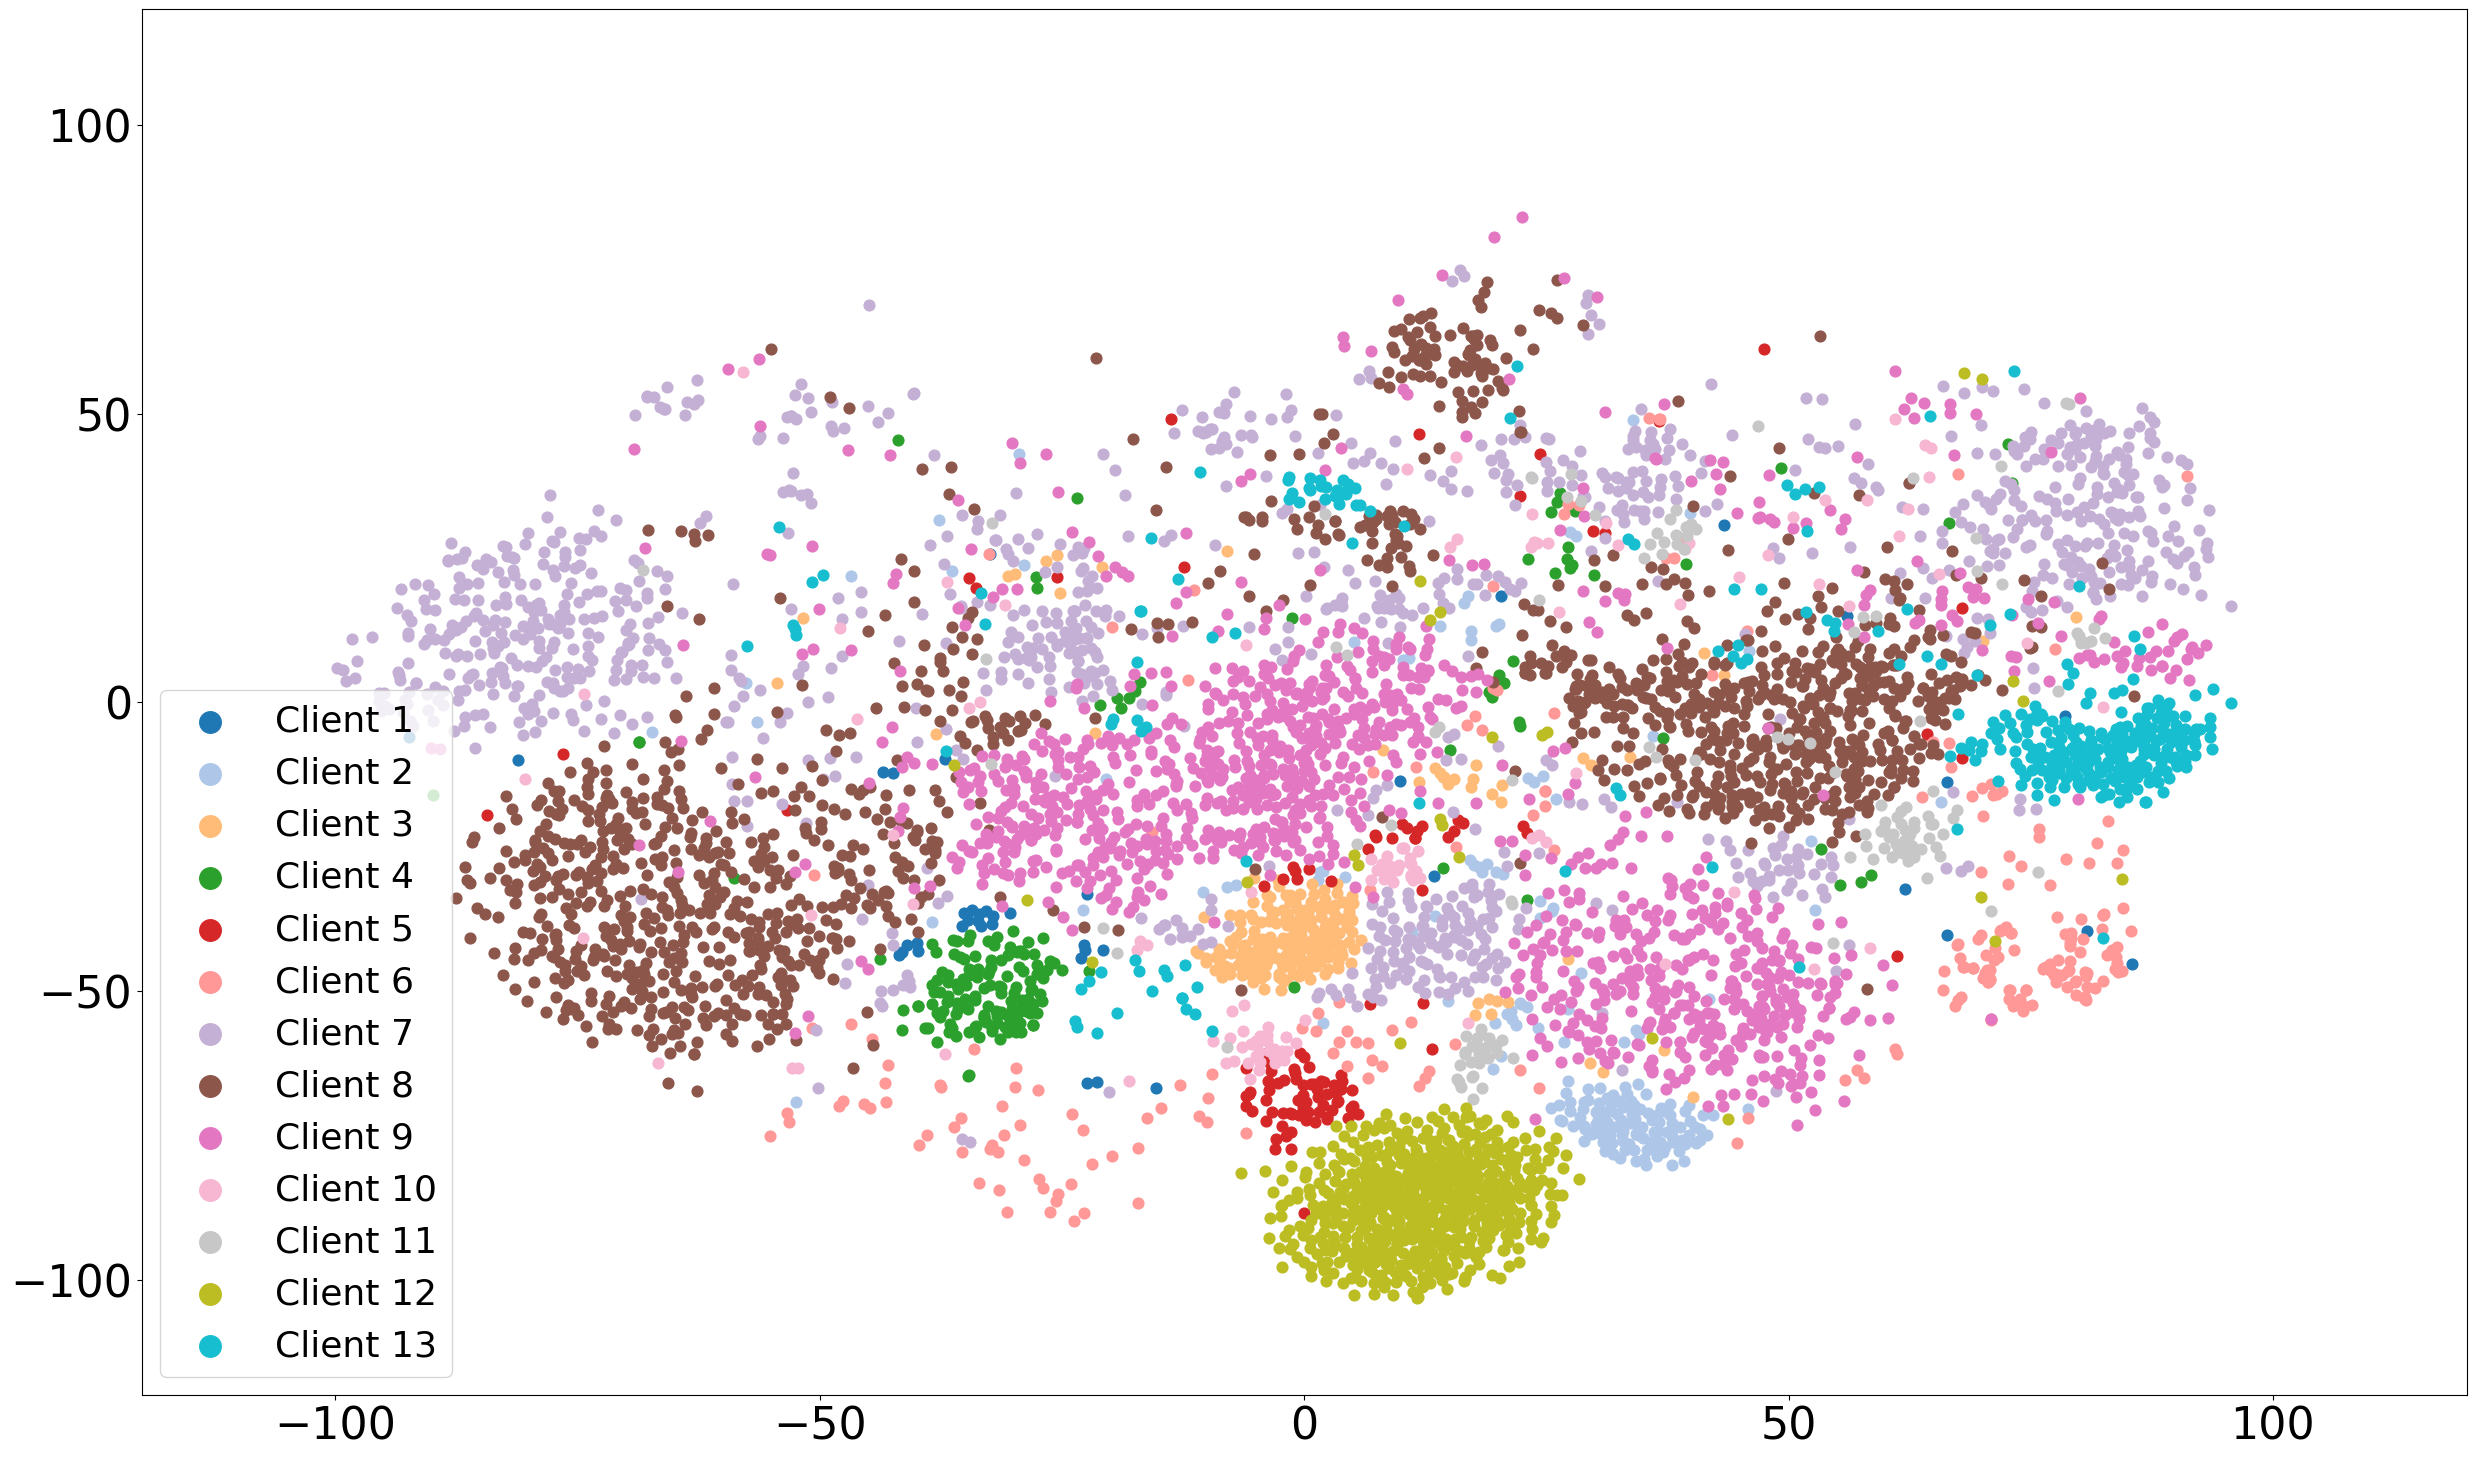

In [239]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_local_global_clients_only_label_0 = X_embedded_local_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_global_clients_only_label_0[:,0], X_embedded_local_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_global_comparison_label_0')

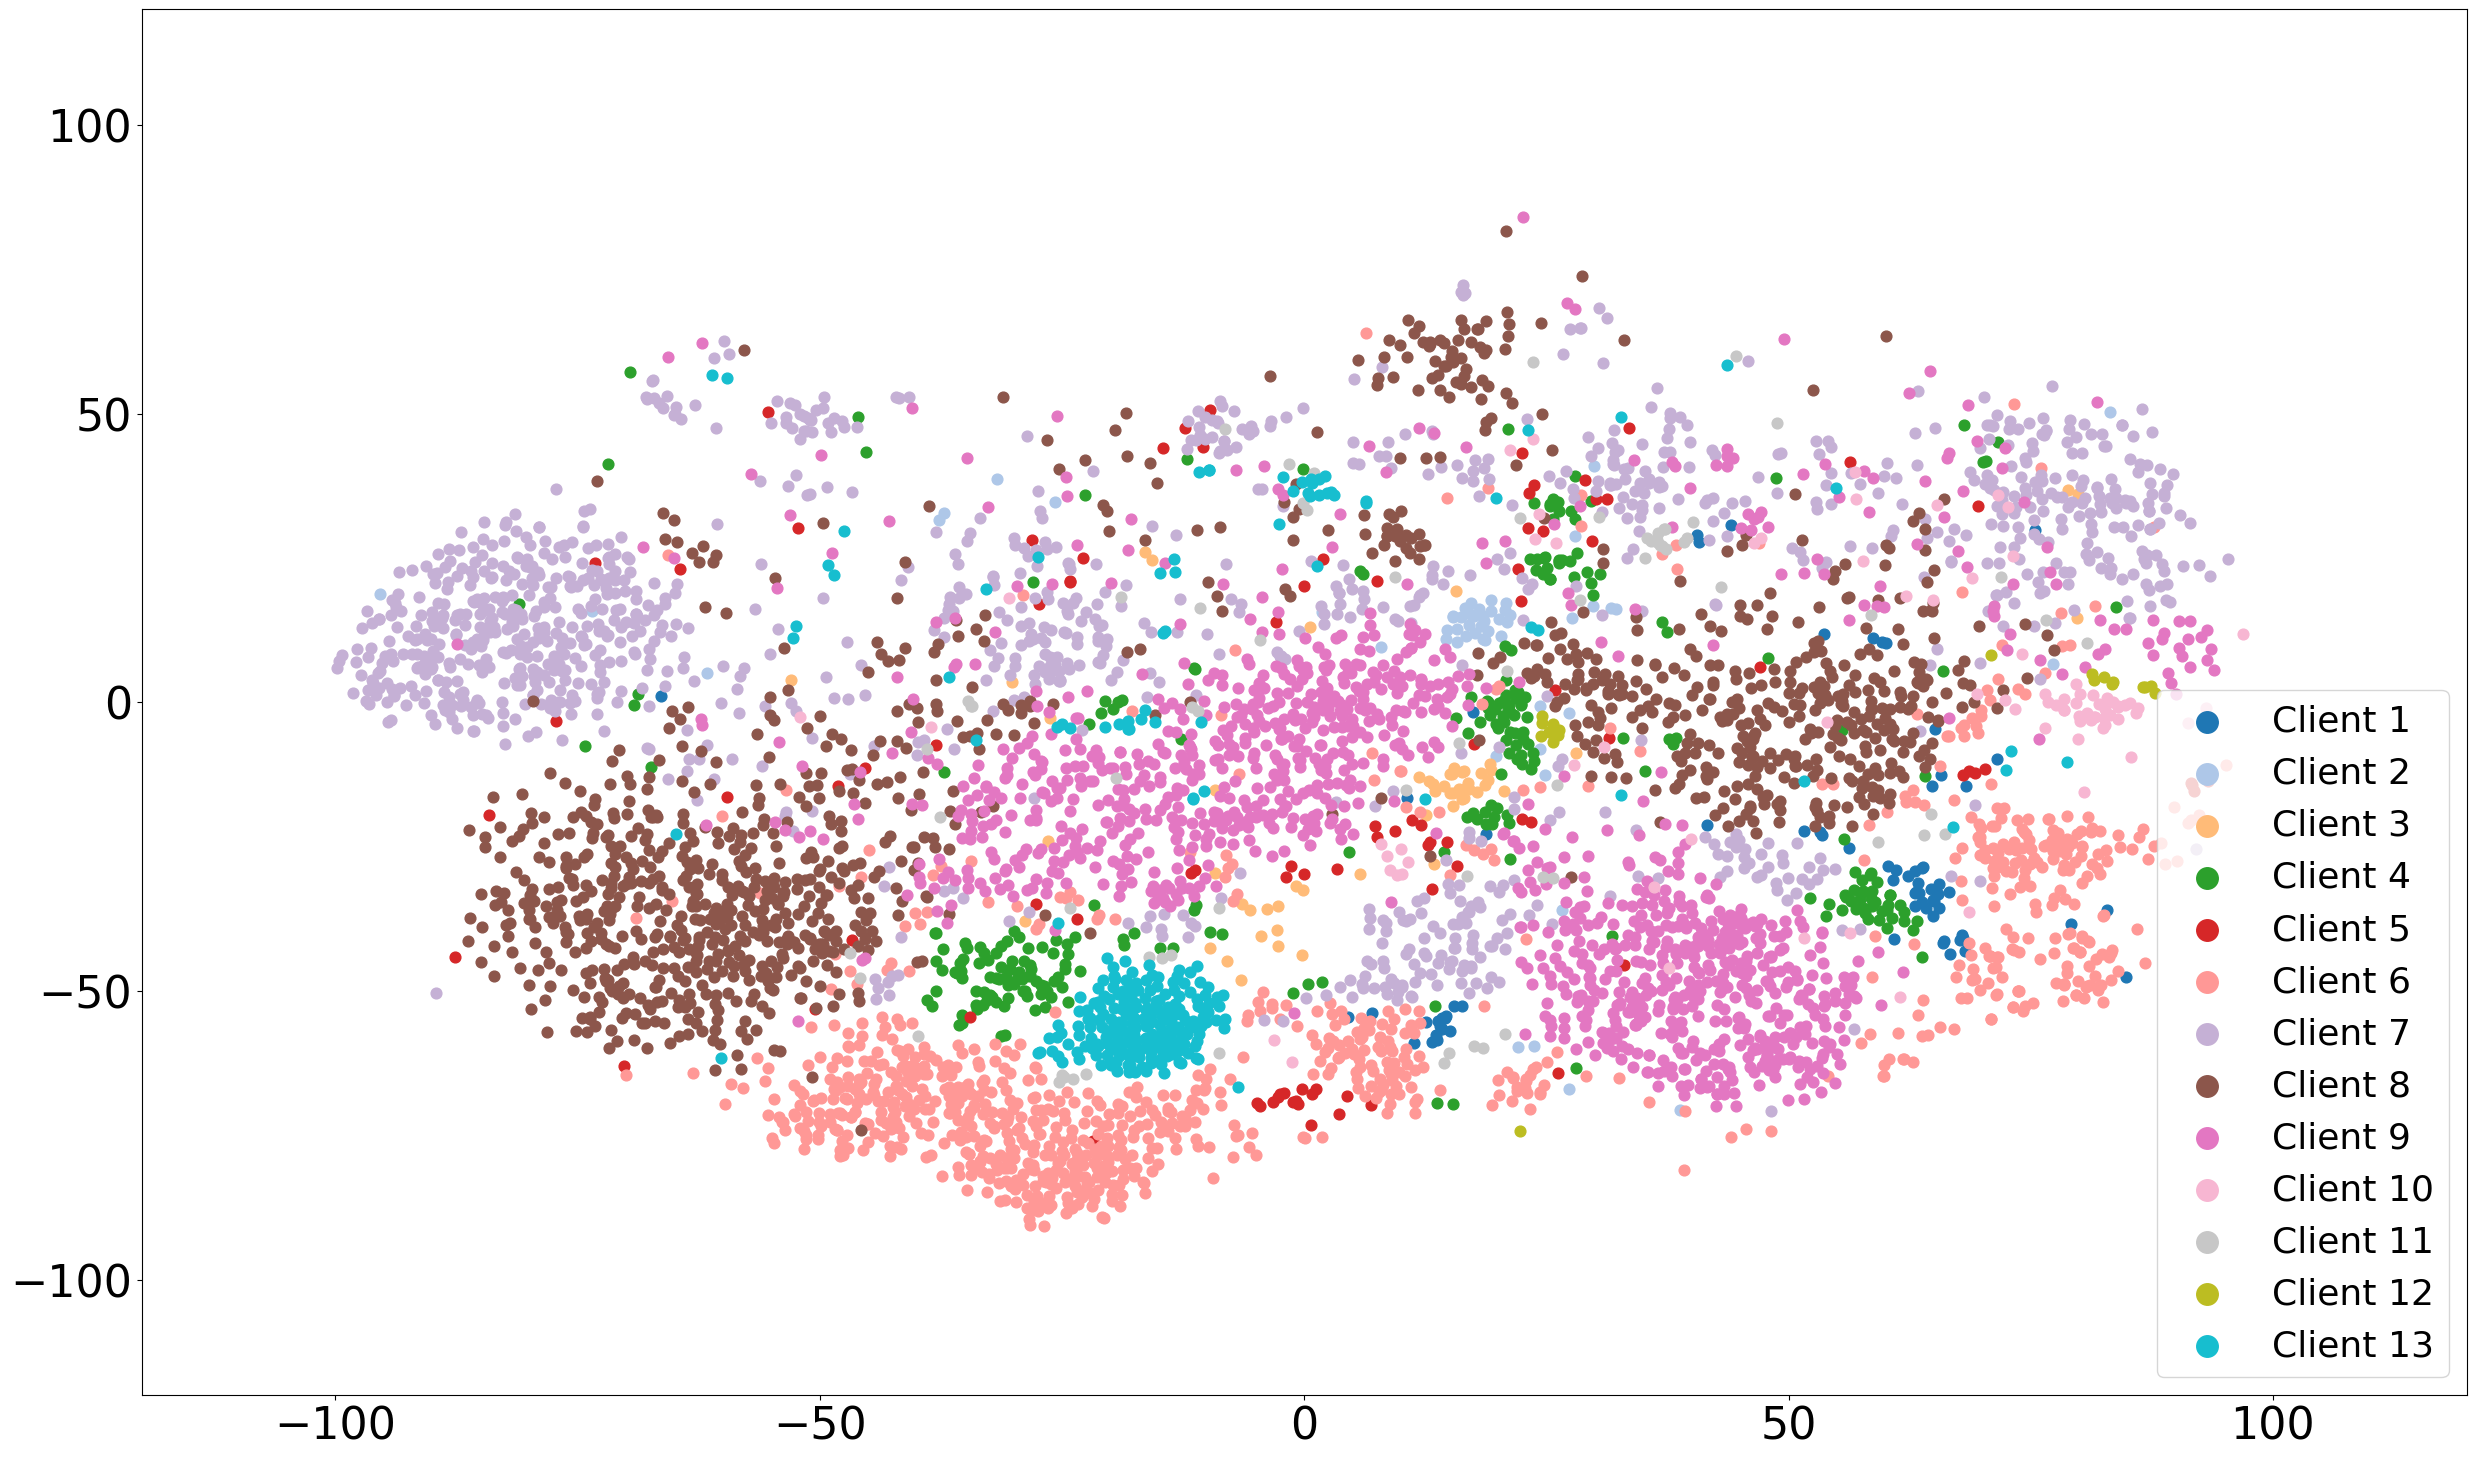

In [240]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 1
    X_embedded_local_global_clients_only_label_0 = X_embedded_local_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_global_clients_only_label_0[:,0], X_embedded_local_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_global_comparison_label_1')

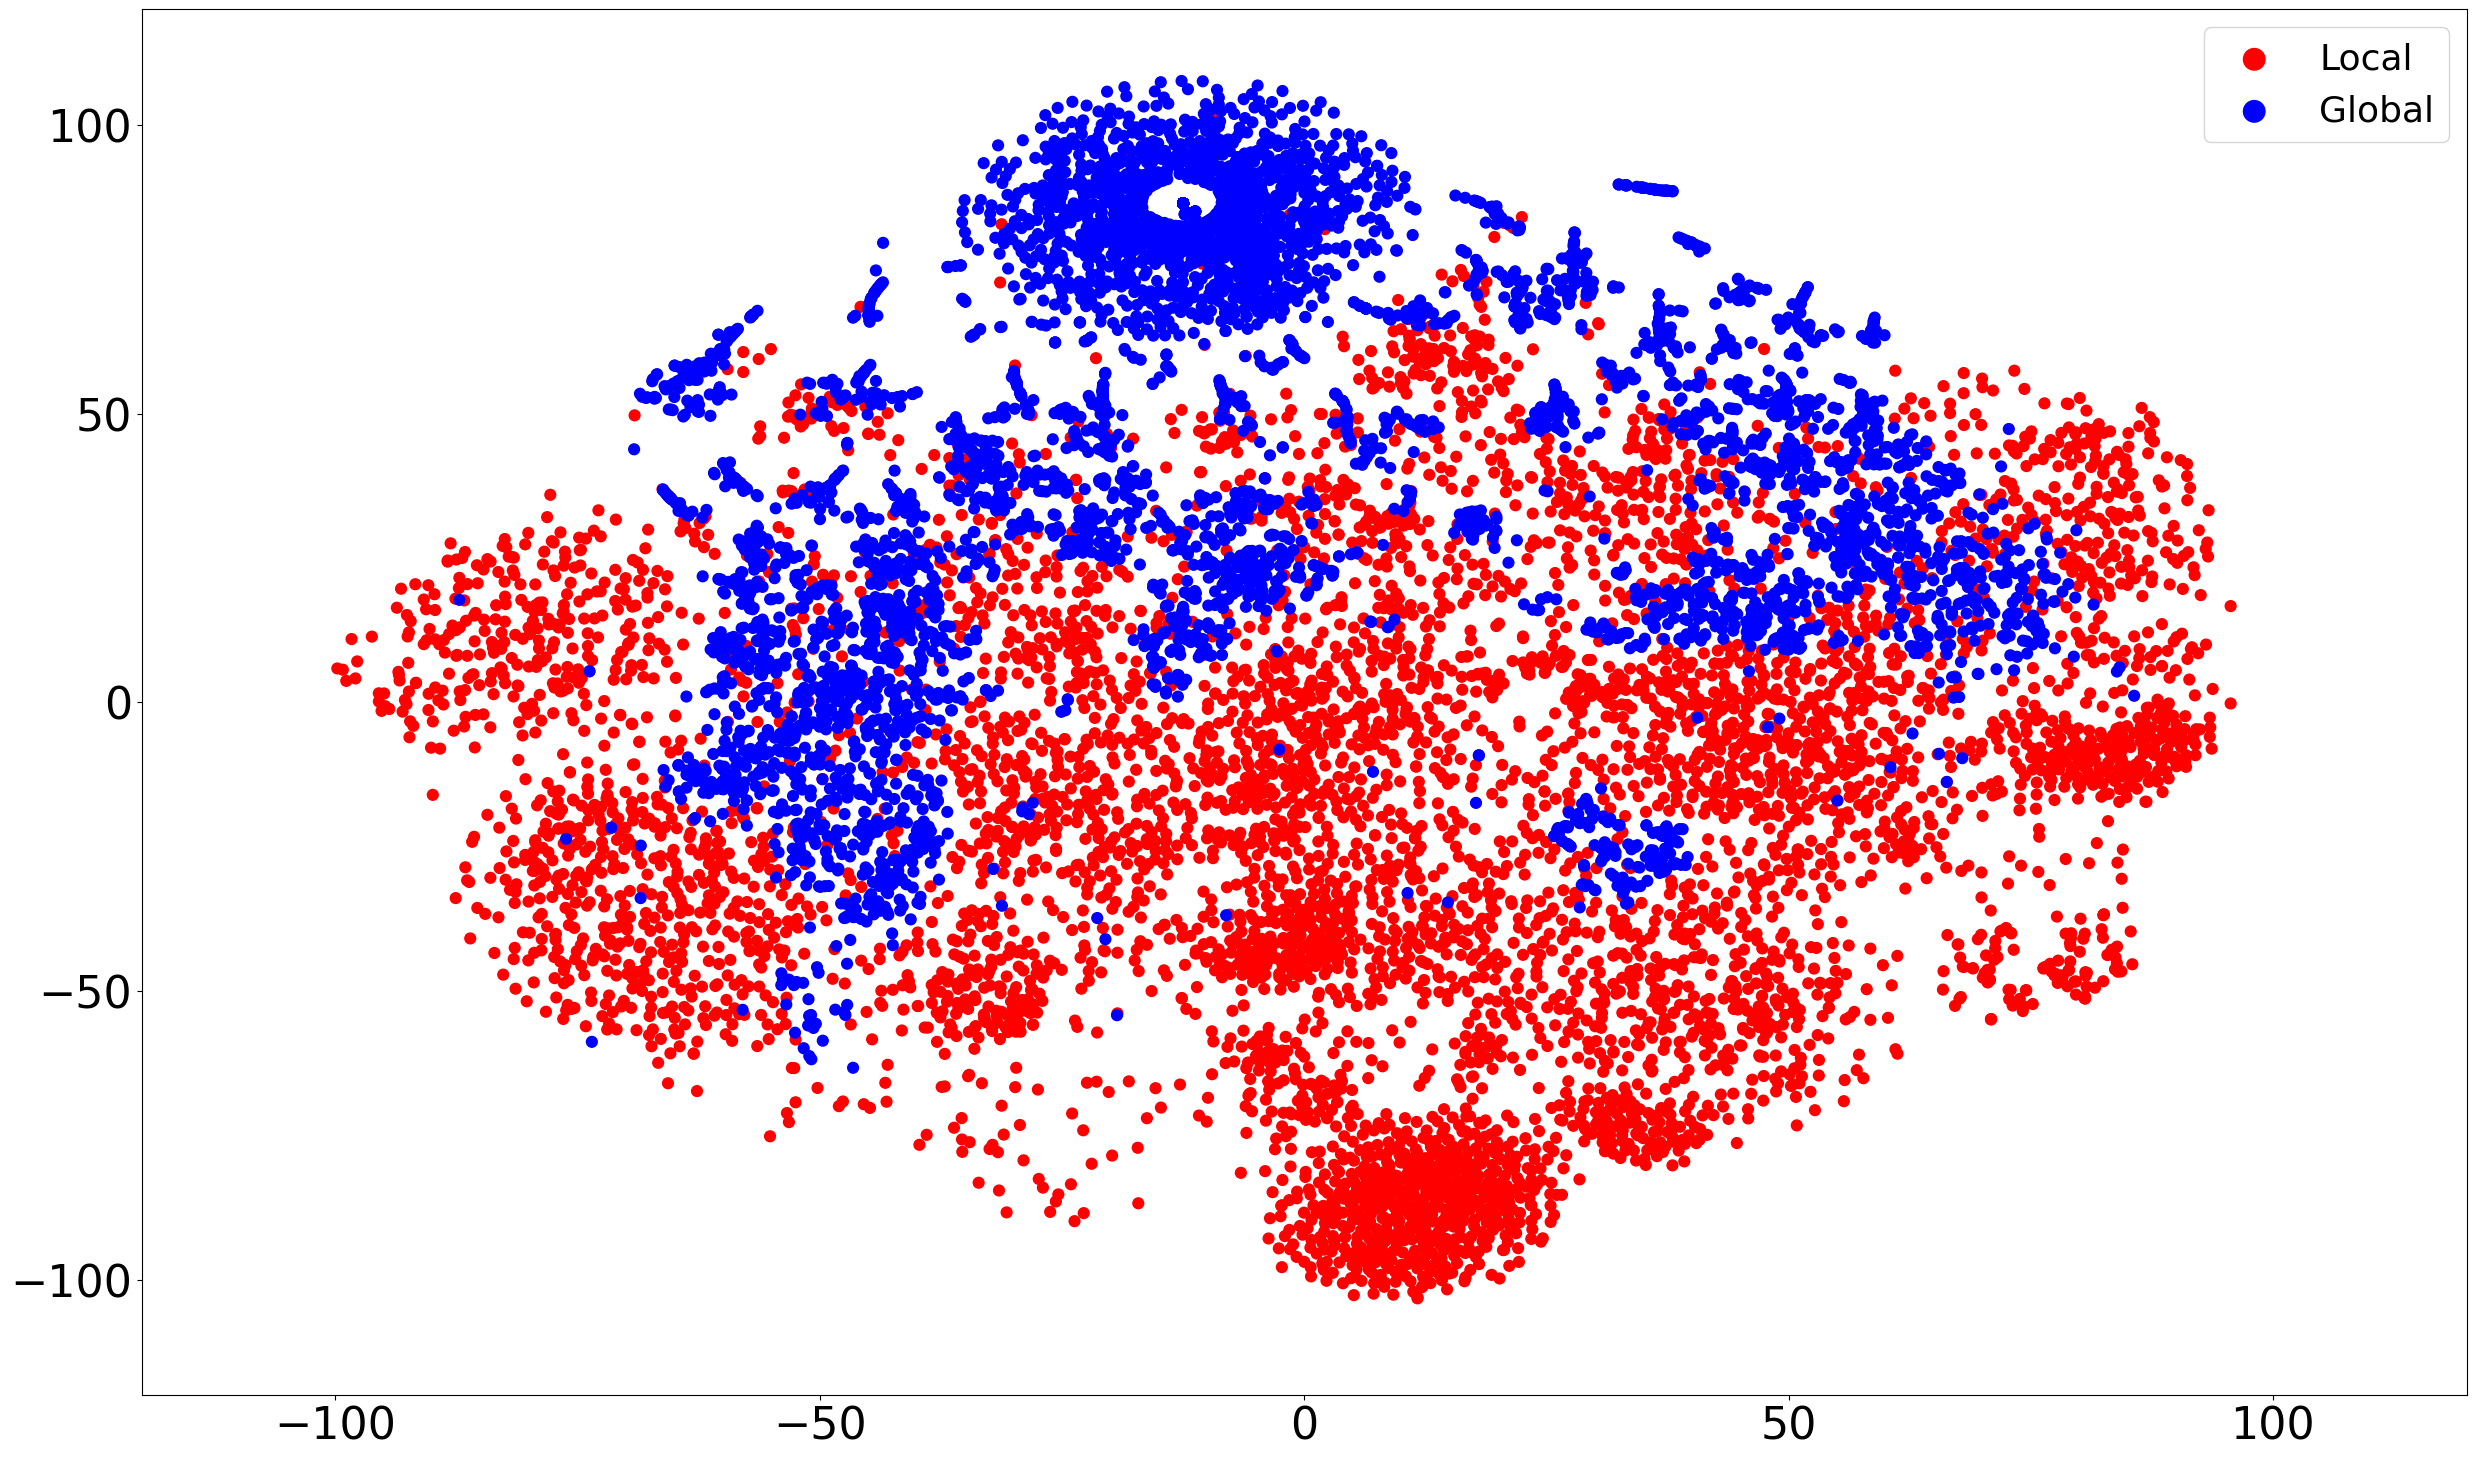

<Figure size 3000x1800 with 0 Axes>

In [241]:
colors=['red', 'blue']

labels_use = labels_concat == 0
X_use_local = X_embedded_local[labels_use, :]
X_use_global = X_embedded_global[labels_use, :]
plt.scatter(X_use_local[:, 0], X_use_local[:, 1], c=[colors[0]]*X_use_local.shape[0],
            label=f'Local', s=60)
plt.scatter(X_use_global[:, 0], X_use_global[:, 1], c=[colors[1]]*X_use_global.shape[0],
            label=f'Global', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + 'comparison_local_to_global_label_0')
plt.show()
plt.clf()

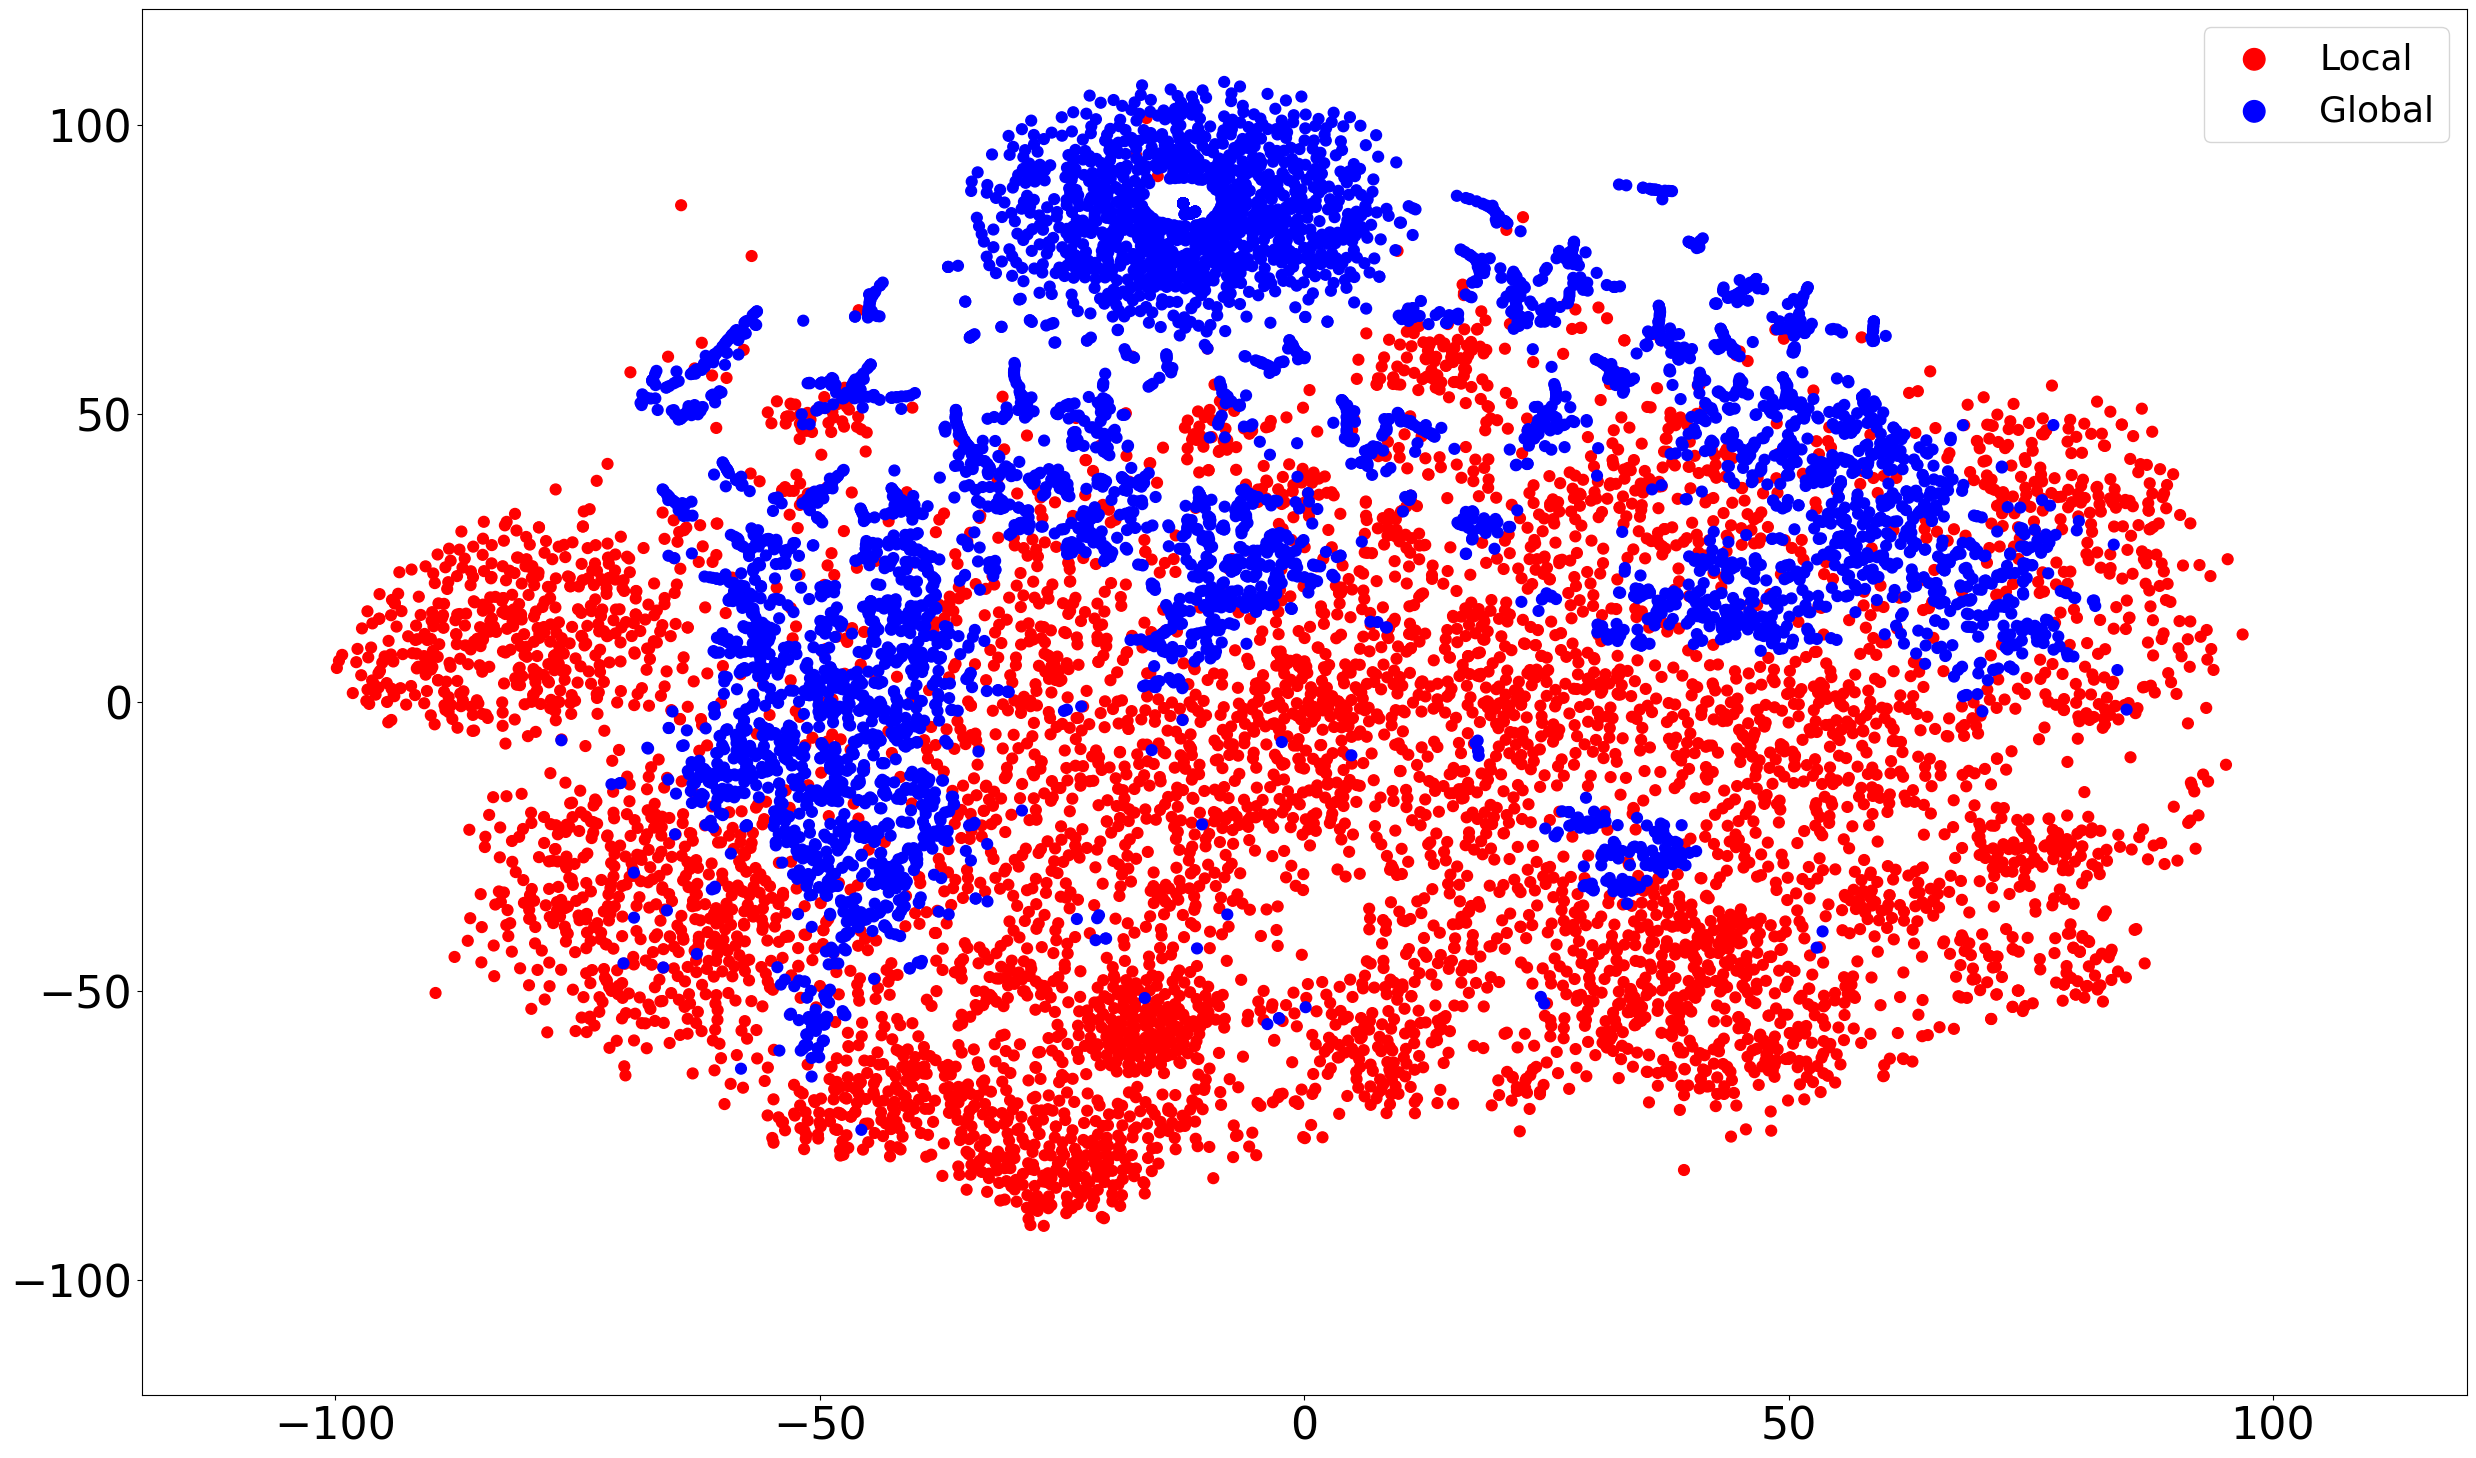

<Figure size 3000x1800 with 0 Axes>

In [242]:
colors=['red', 'blue']

labels_use = labels_concat == 1
X_use_local = X_embedded_local[labels_use, :]
X_use_global = X_embedded_global[labels_use, :]
plt.scatter(X_use_local[:, 0], X_use_local[:, 1], c=[colors[0]]*X_use_local.shape[0],
            label=f'Local', s=60)
plt.scatter(X_use_global[:, 0], X_use_global[:, 1], c=[colors[1]]*X_use_global.shape[0],
            label=f'Global', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + 'comparison_local_to_global_label_1')
plt.show()
plt.clf()